In [242]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
from pydmd import DMD

In [243]:
import pandas as pd 
train=pd.read_csv('emissions.csv')
train.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [244]:
train1=train.drop(['ISO 3166-1 alpha-3','Coal','Oil','Gas','Cement','Flaring','Other','Per Capita'],axis=1)

In [245]:
train1.head()

,Country,Year,Total
0,Afghanistan,1750,0.0
1,Afghanistan,1751,0.0
2,Afghanistan,1752,0.0
3,Afghanistan,1753,0.0
4,Afghanistan,1754,0.0


In [246]:
modtrain=train1[train1.Year>1999]

In [247]:
modtrain1=modtrain.sort_values('Year')

In [248]:
modtrain1.shape

(5104, 3)

In [249]:
w=train1[train1.Country=='Albania']
q1=w[w.Year>1999].T
q1
q2=q1.drop(['Country','Year'])
q2
np.array(q2)

array([[3.024926, 3.220656, 3.748272, 4.303499, 4.176684, 4.261413,
        3.910715, 3.94897, 4.397043, 4.406552, 4.783865, 5.314676,
        4.85006, 5.287466, 5.999658, 4.712137, 4.631977, 5.564149,
        4.984045, 4.947485, 4.728559, 4.619109]], dtype=object)

In [250]:
l4=train1.Country.unique()
dt=[]
for i in l4:
    w=train1[train1.Country==i]
    q1=w[w.Year>1999].T
    q2=q1.drop(['Country','Year'])
    q3=np.array(q2).flatten()
    dt.append(q3)



In [251]:
l4[-5:]

array(['Yemen', 'Zambia', 'Zimbabwe', 'International Transport', 'Global'],
      dtype=object)

In [252]:
dt=np.array(dt)
dt.shape

(232, 22)

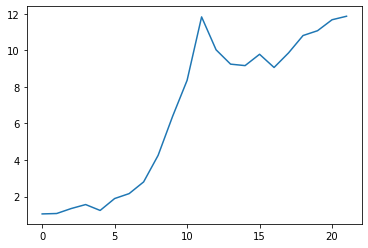

In [253]:
plt.plot(dt[0])

In [254]:
type(dt)

numpy.ndarray

In [255]:

import scipy


from matplotlib import animation
from IPython.display import HTML


1


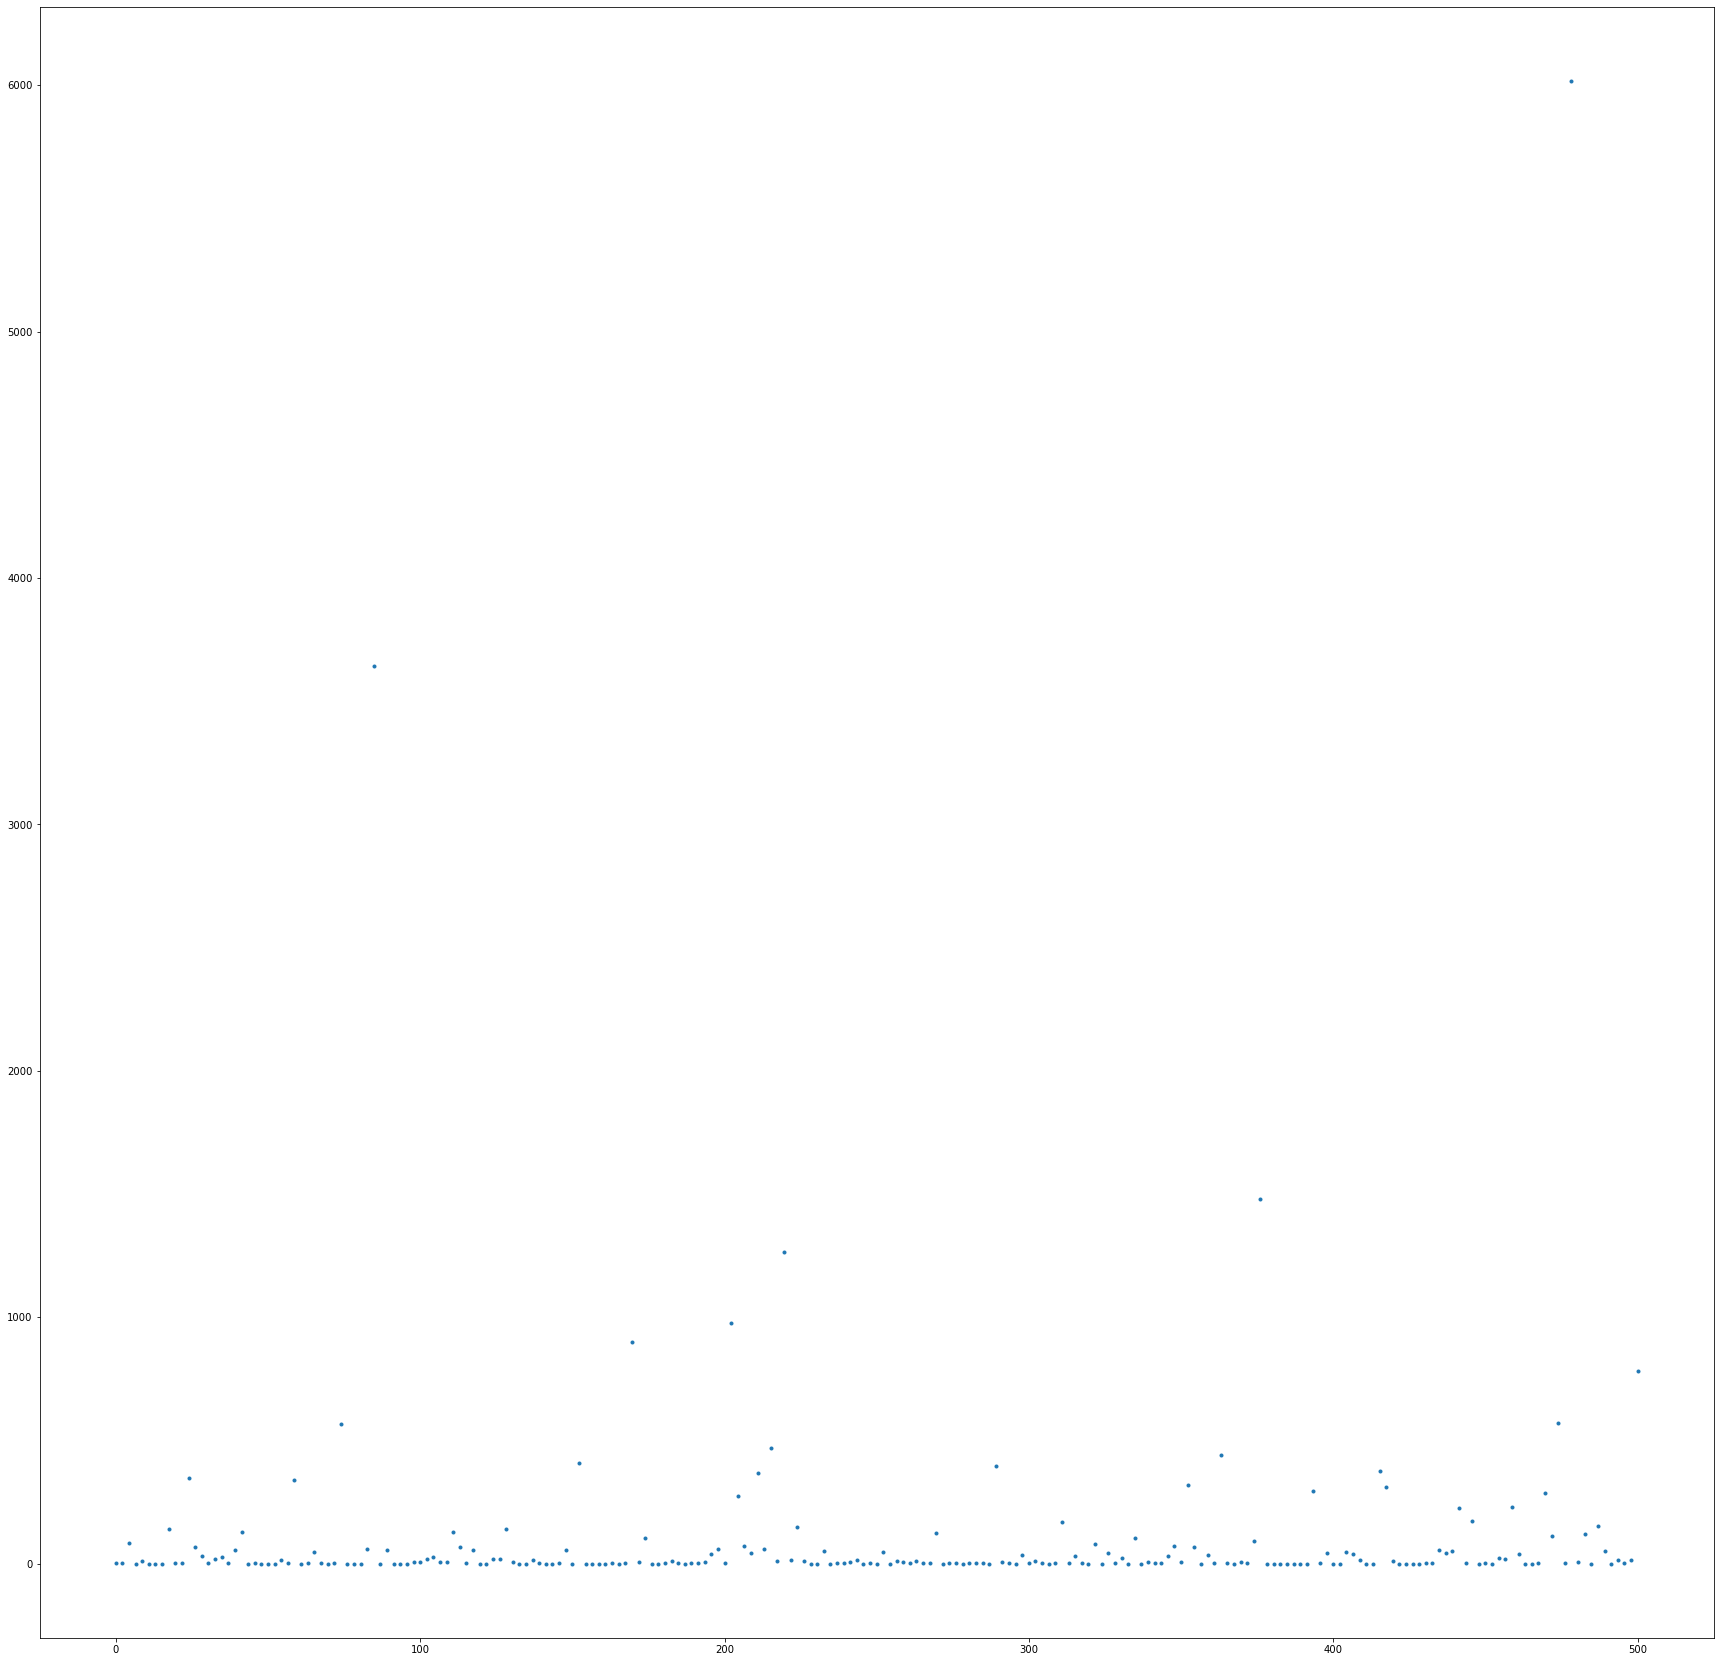

2


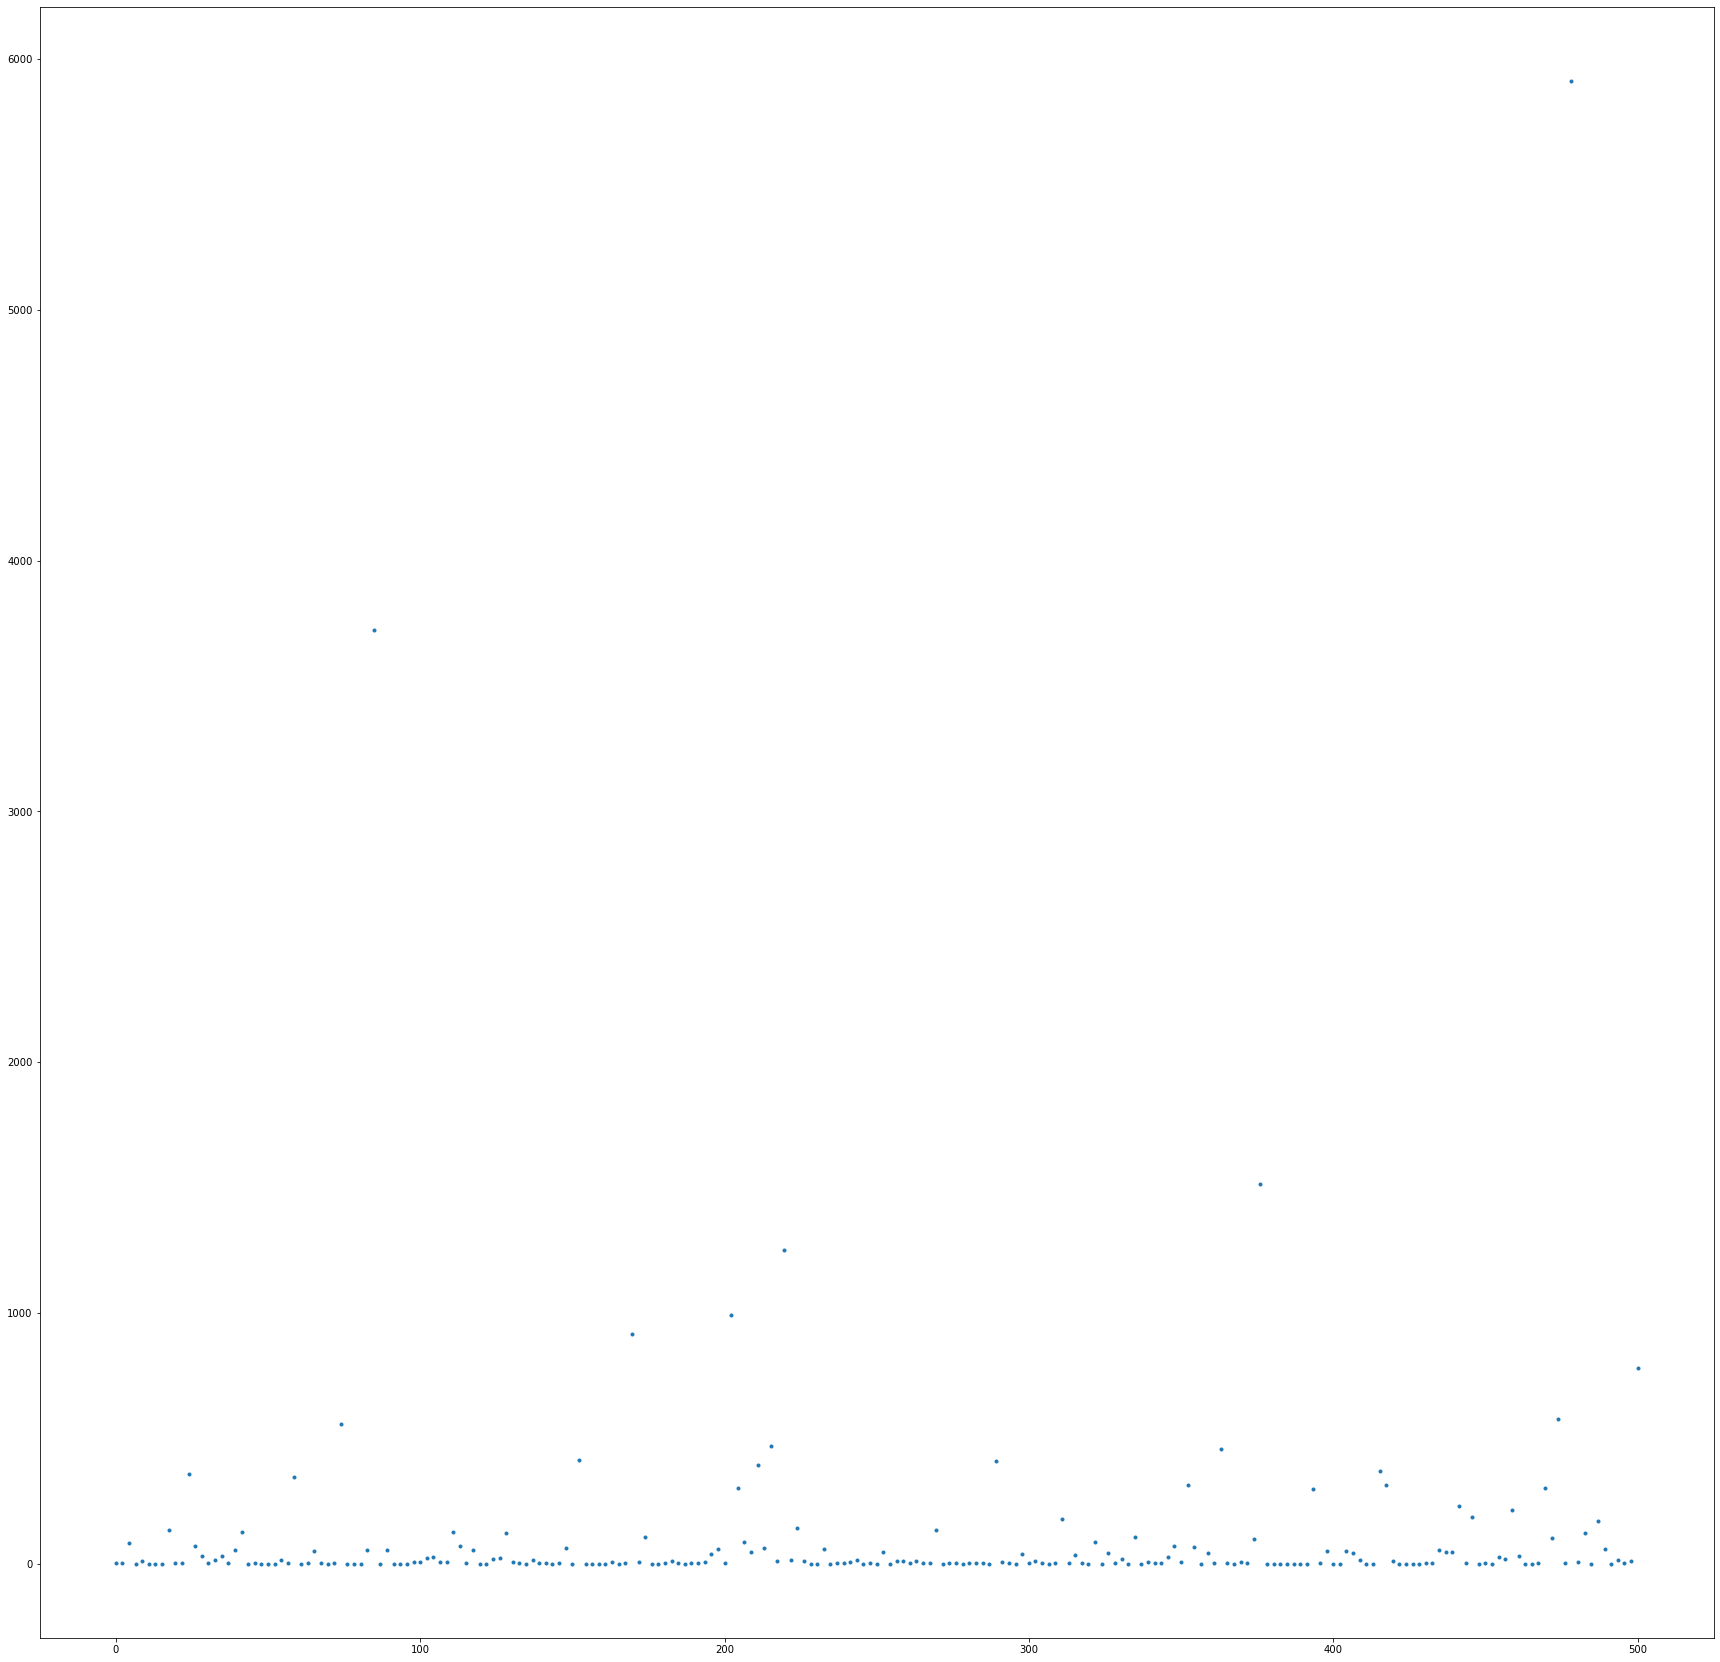

3


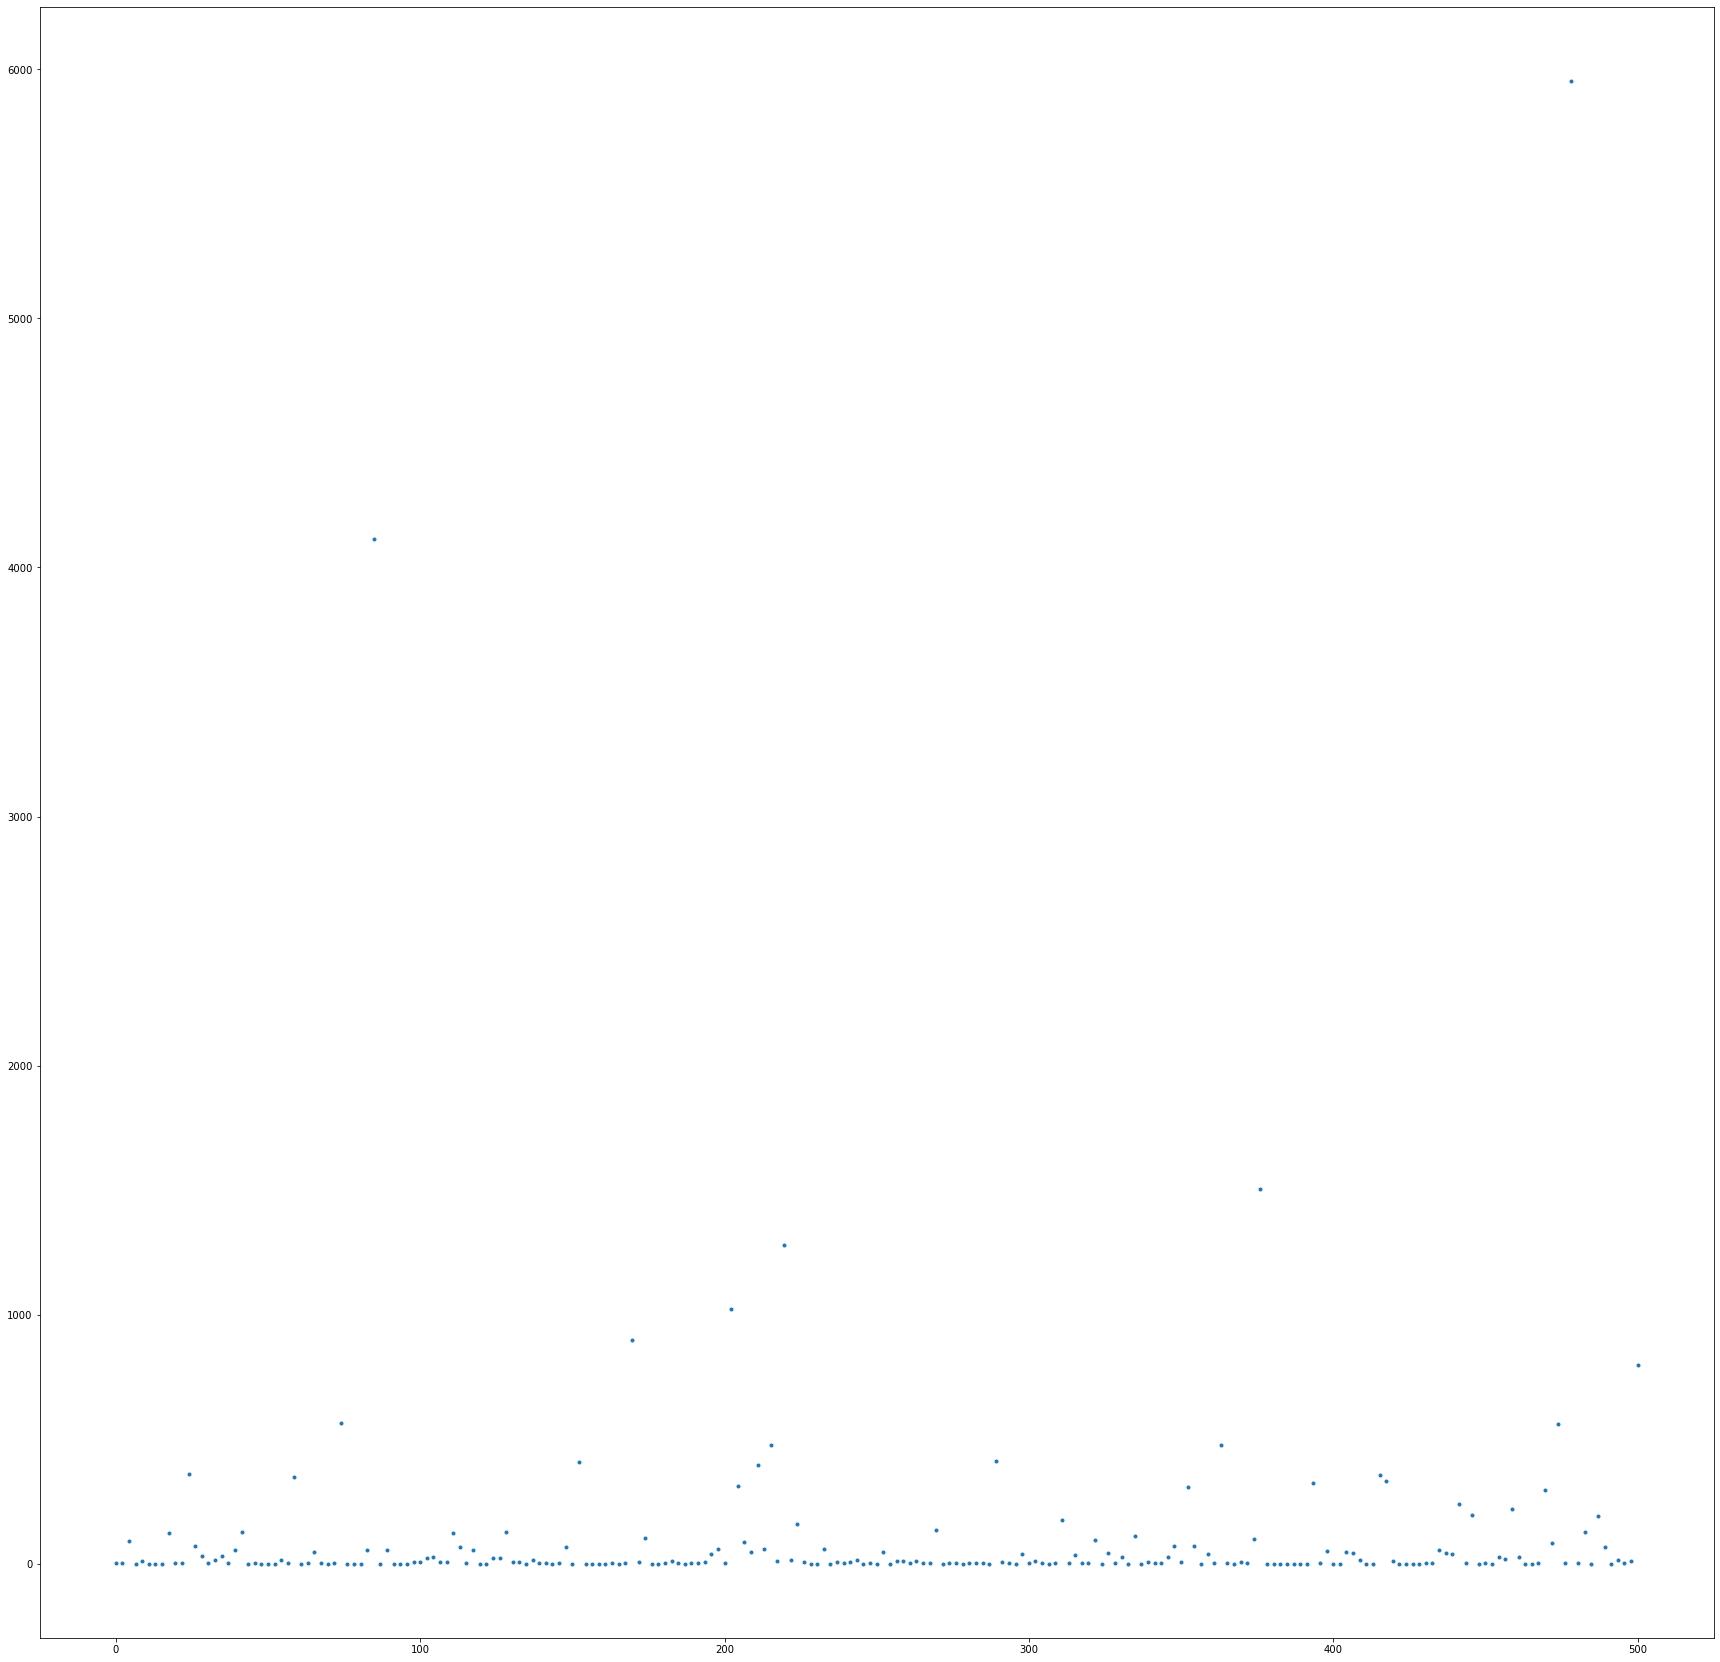

4


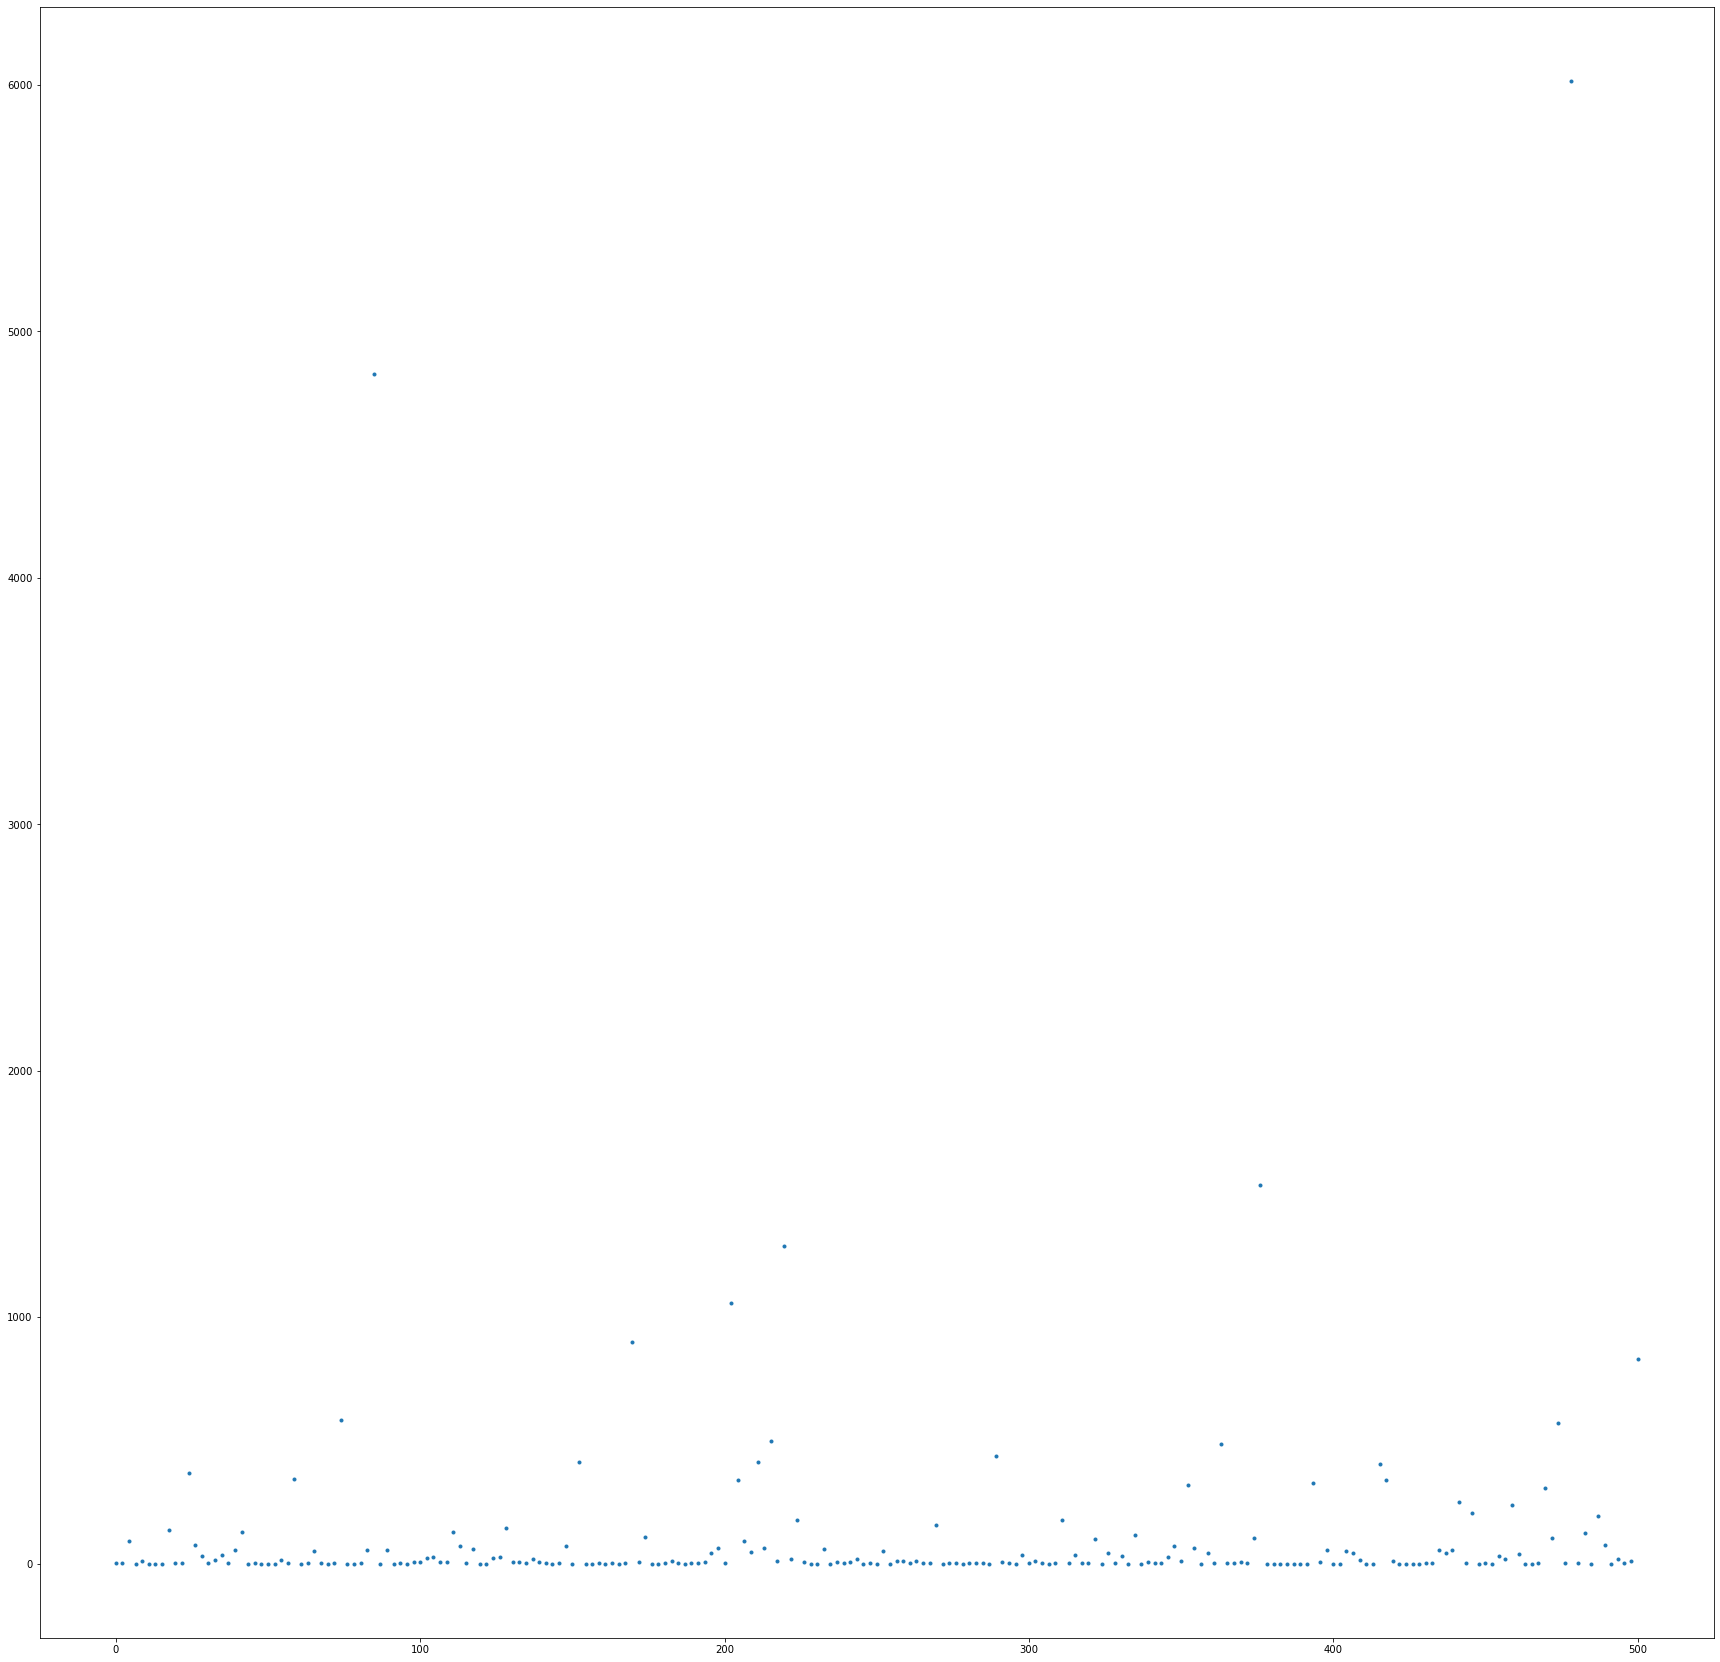

5


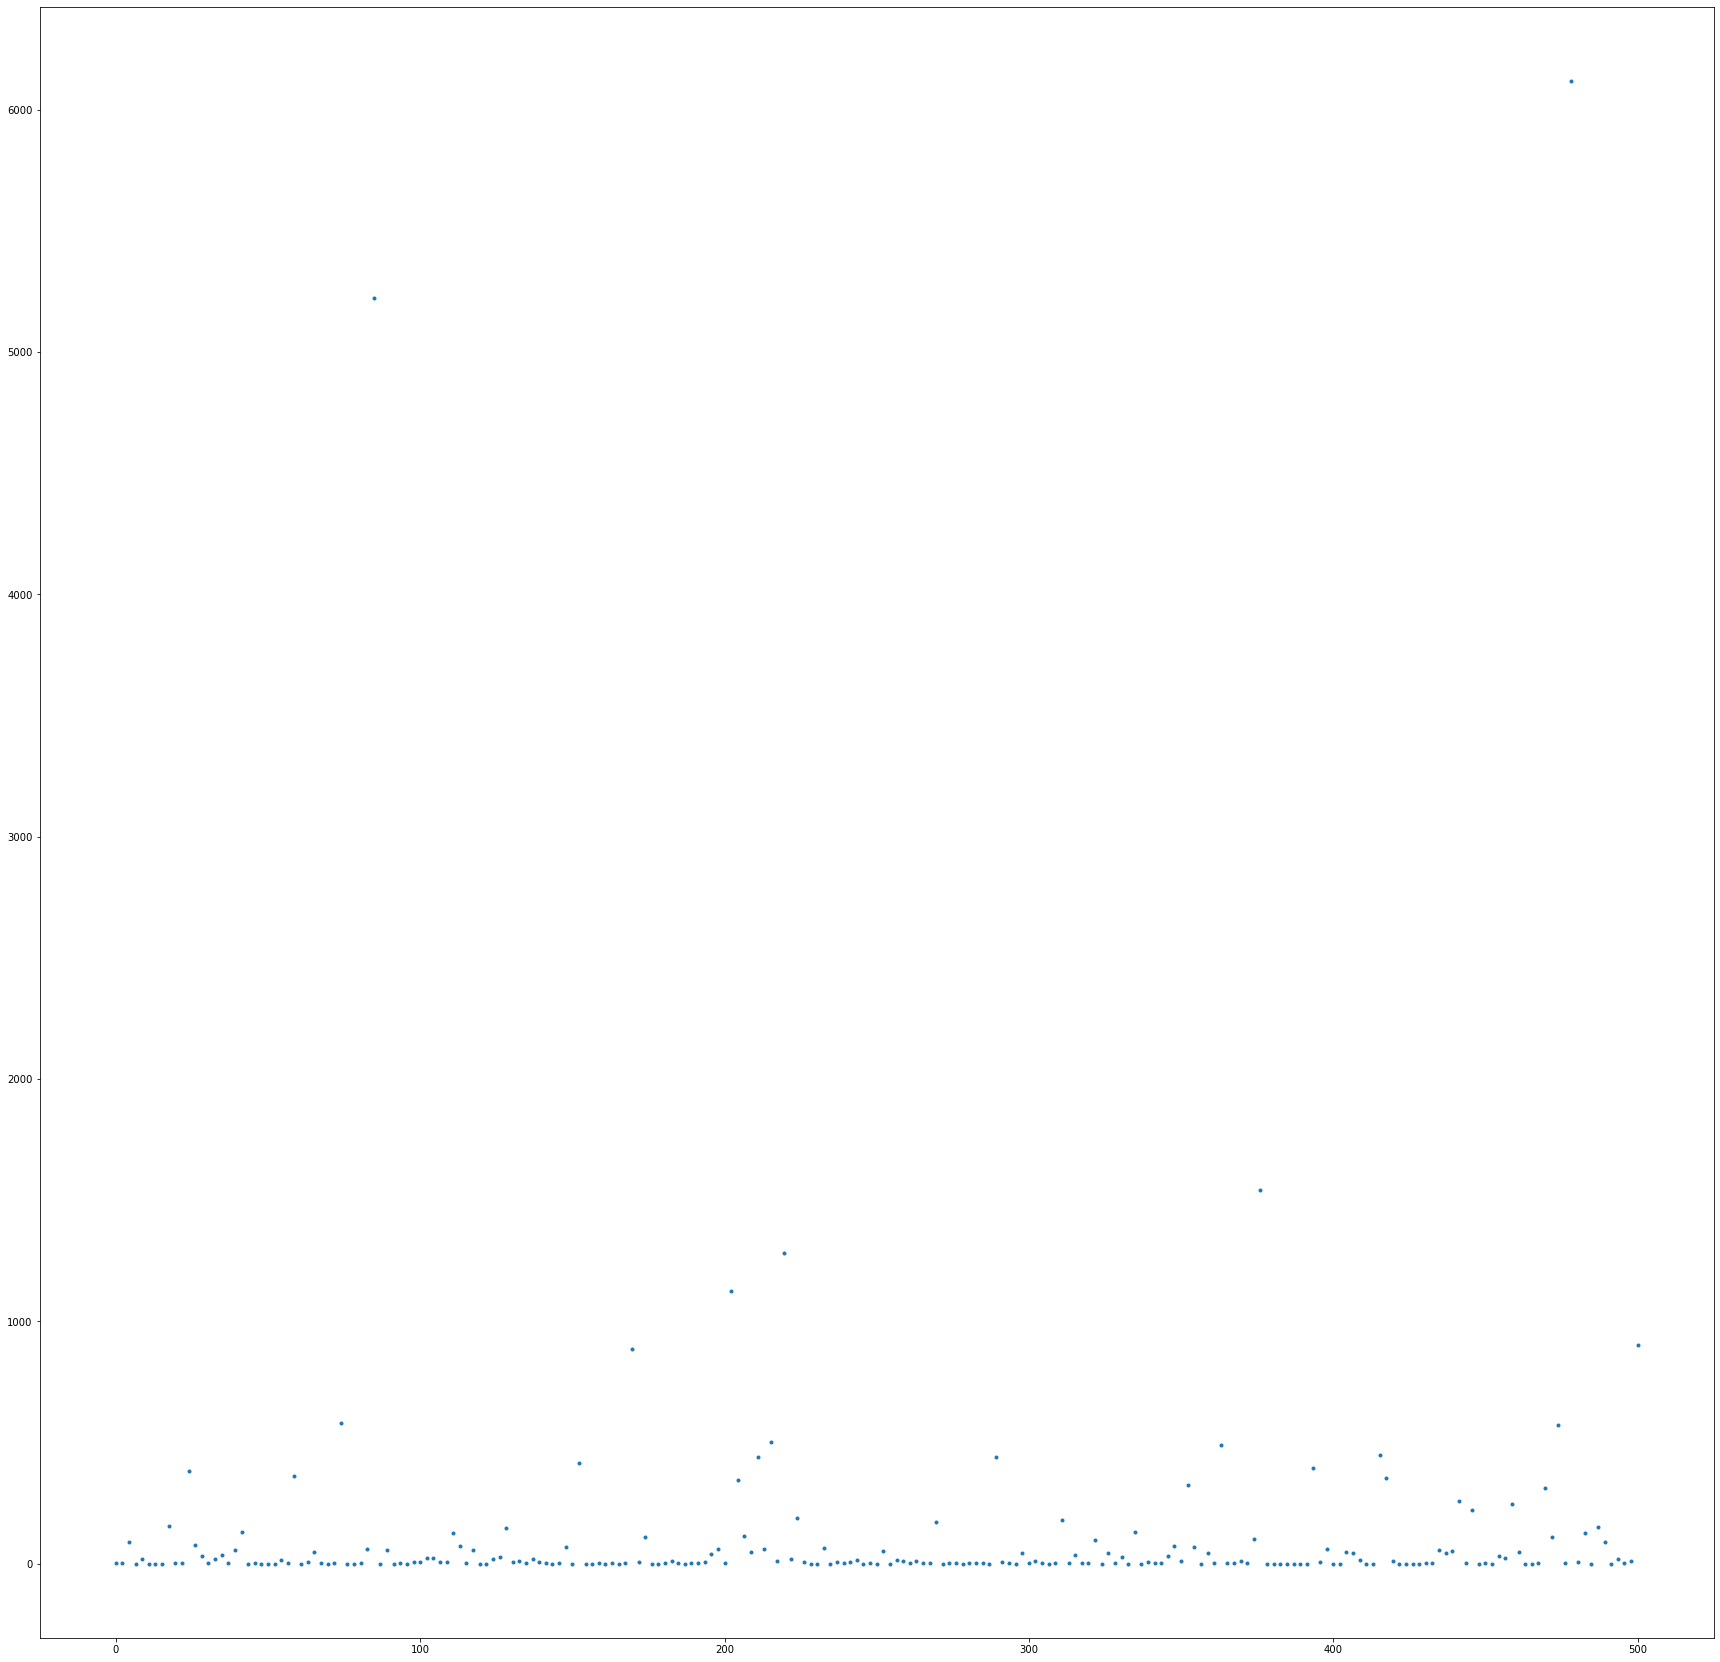

6


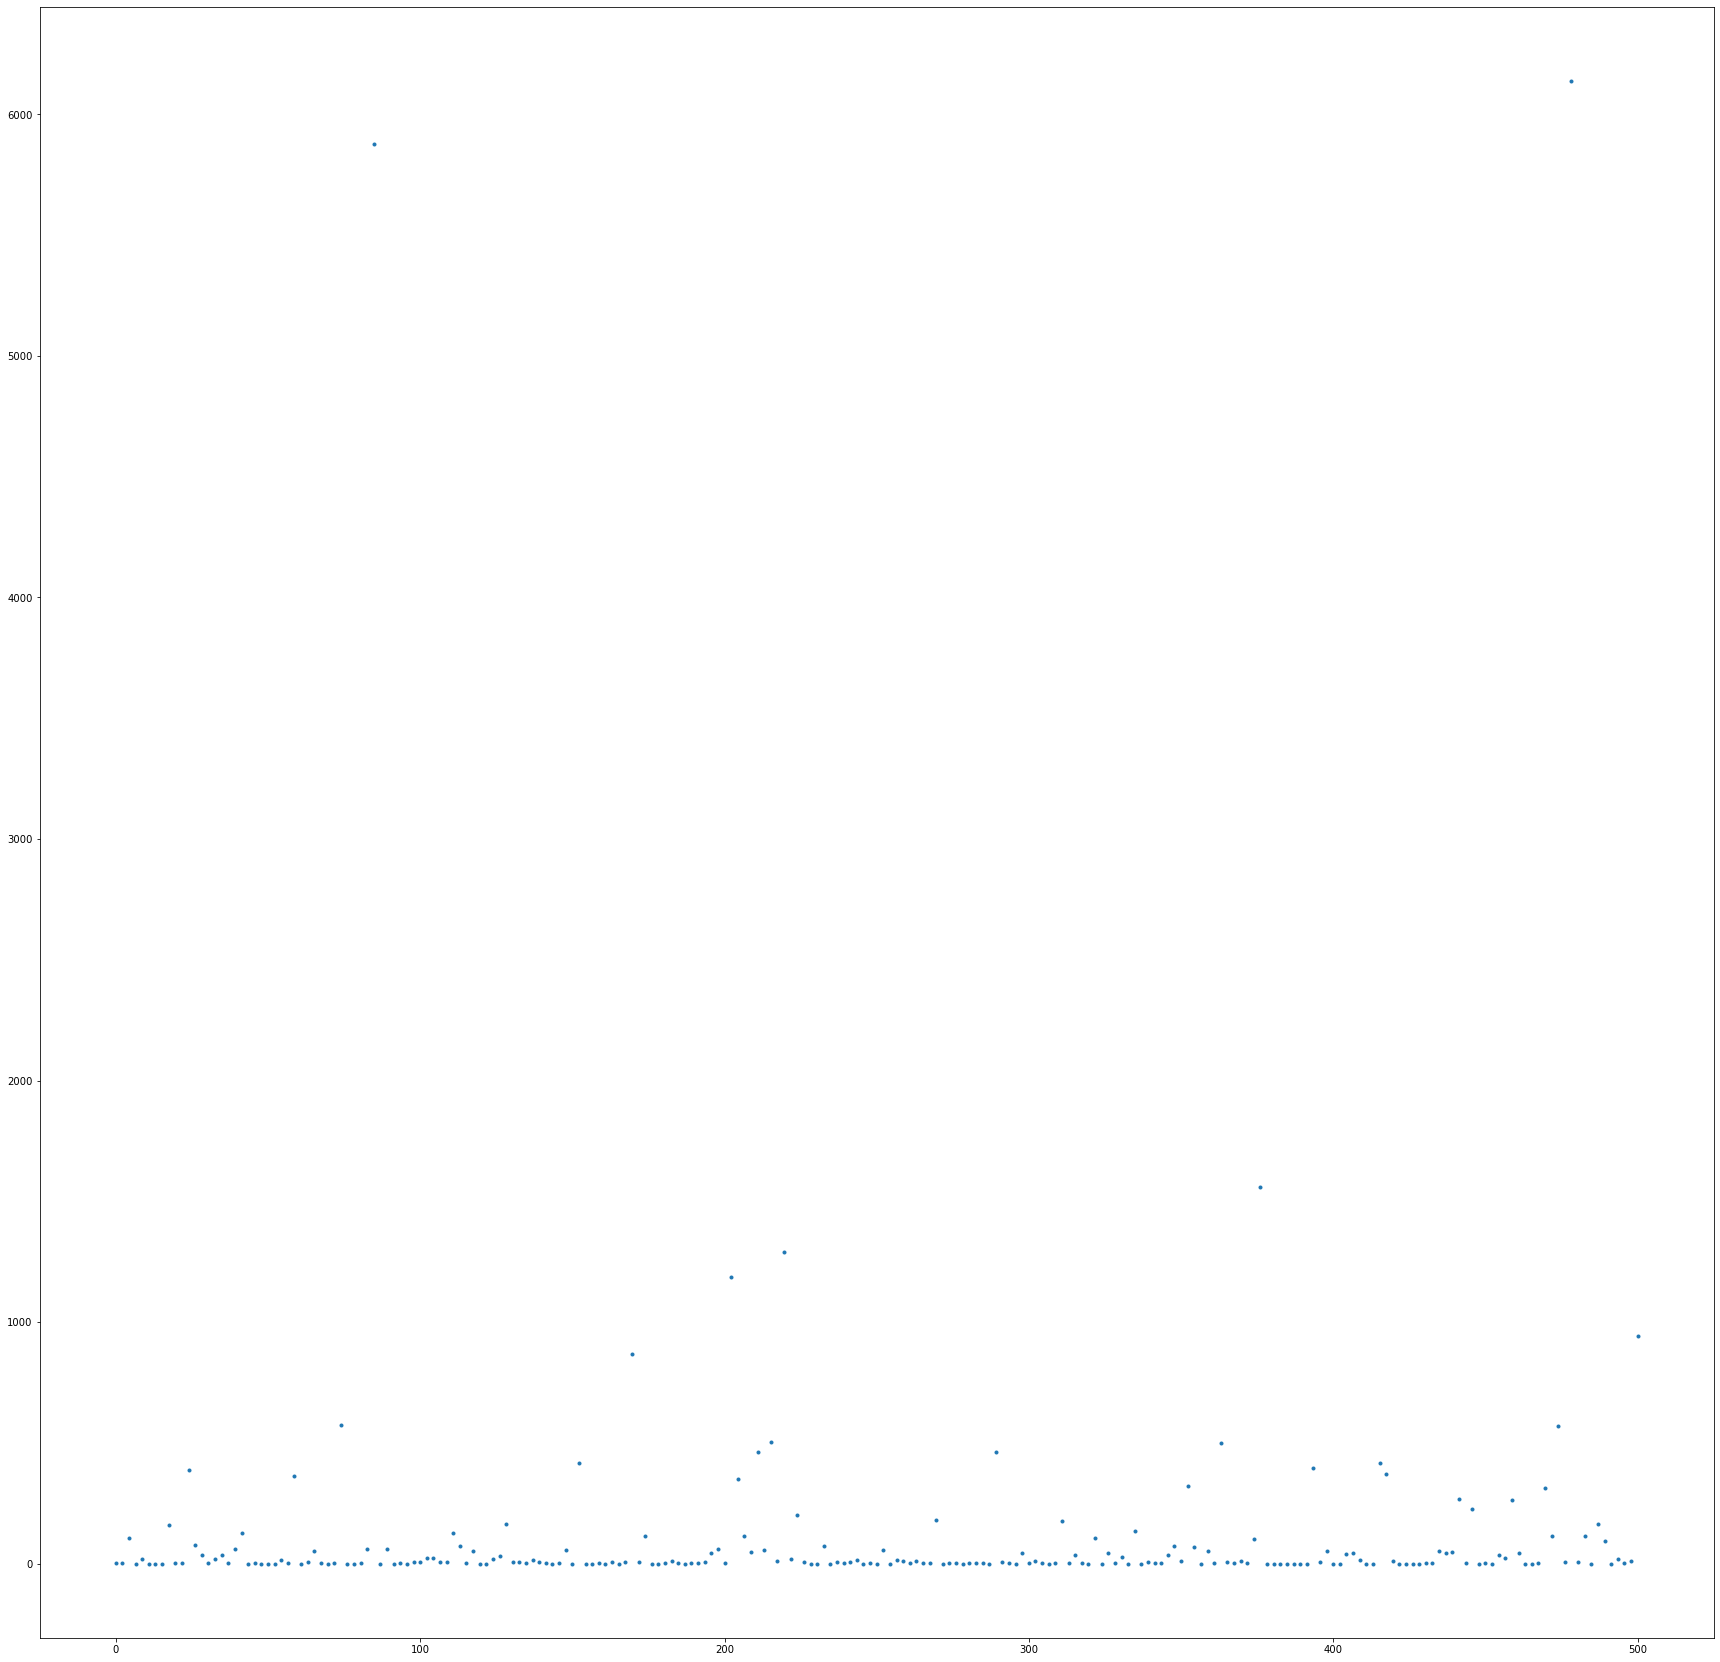

7


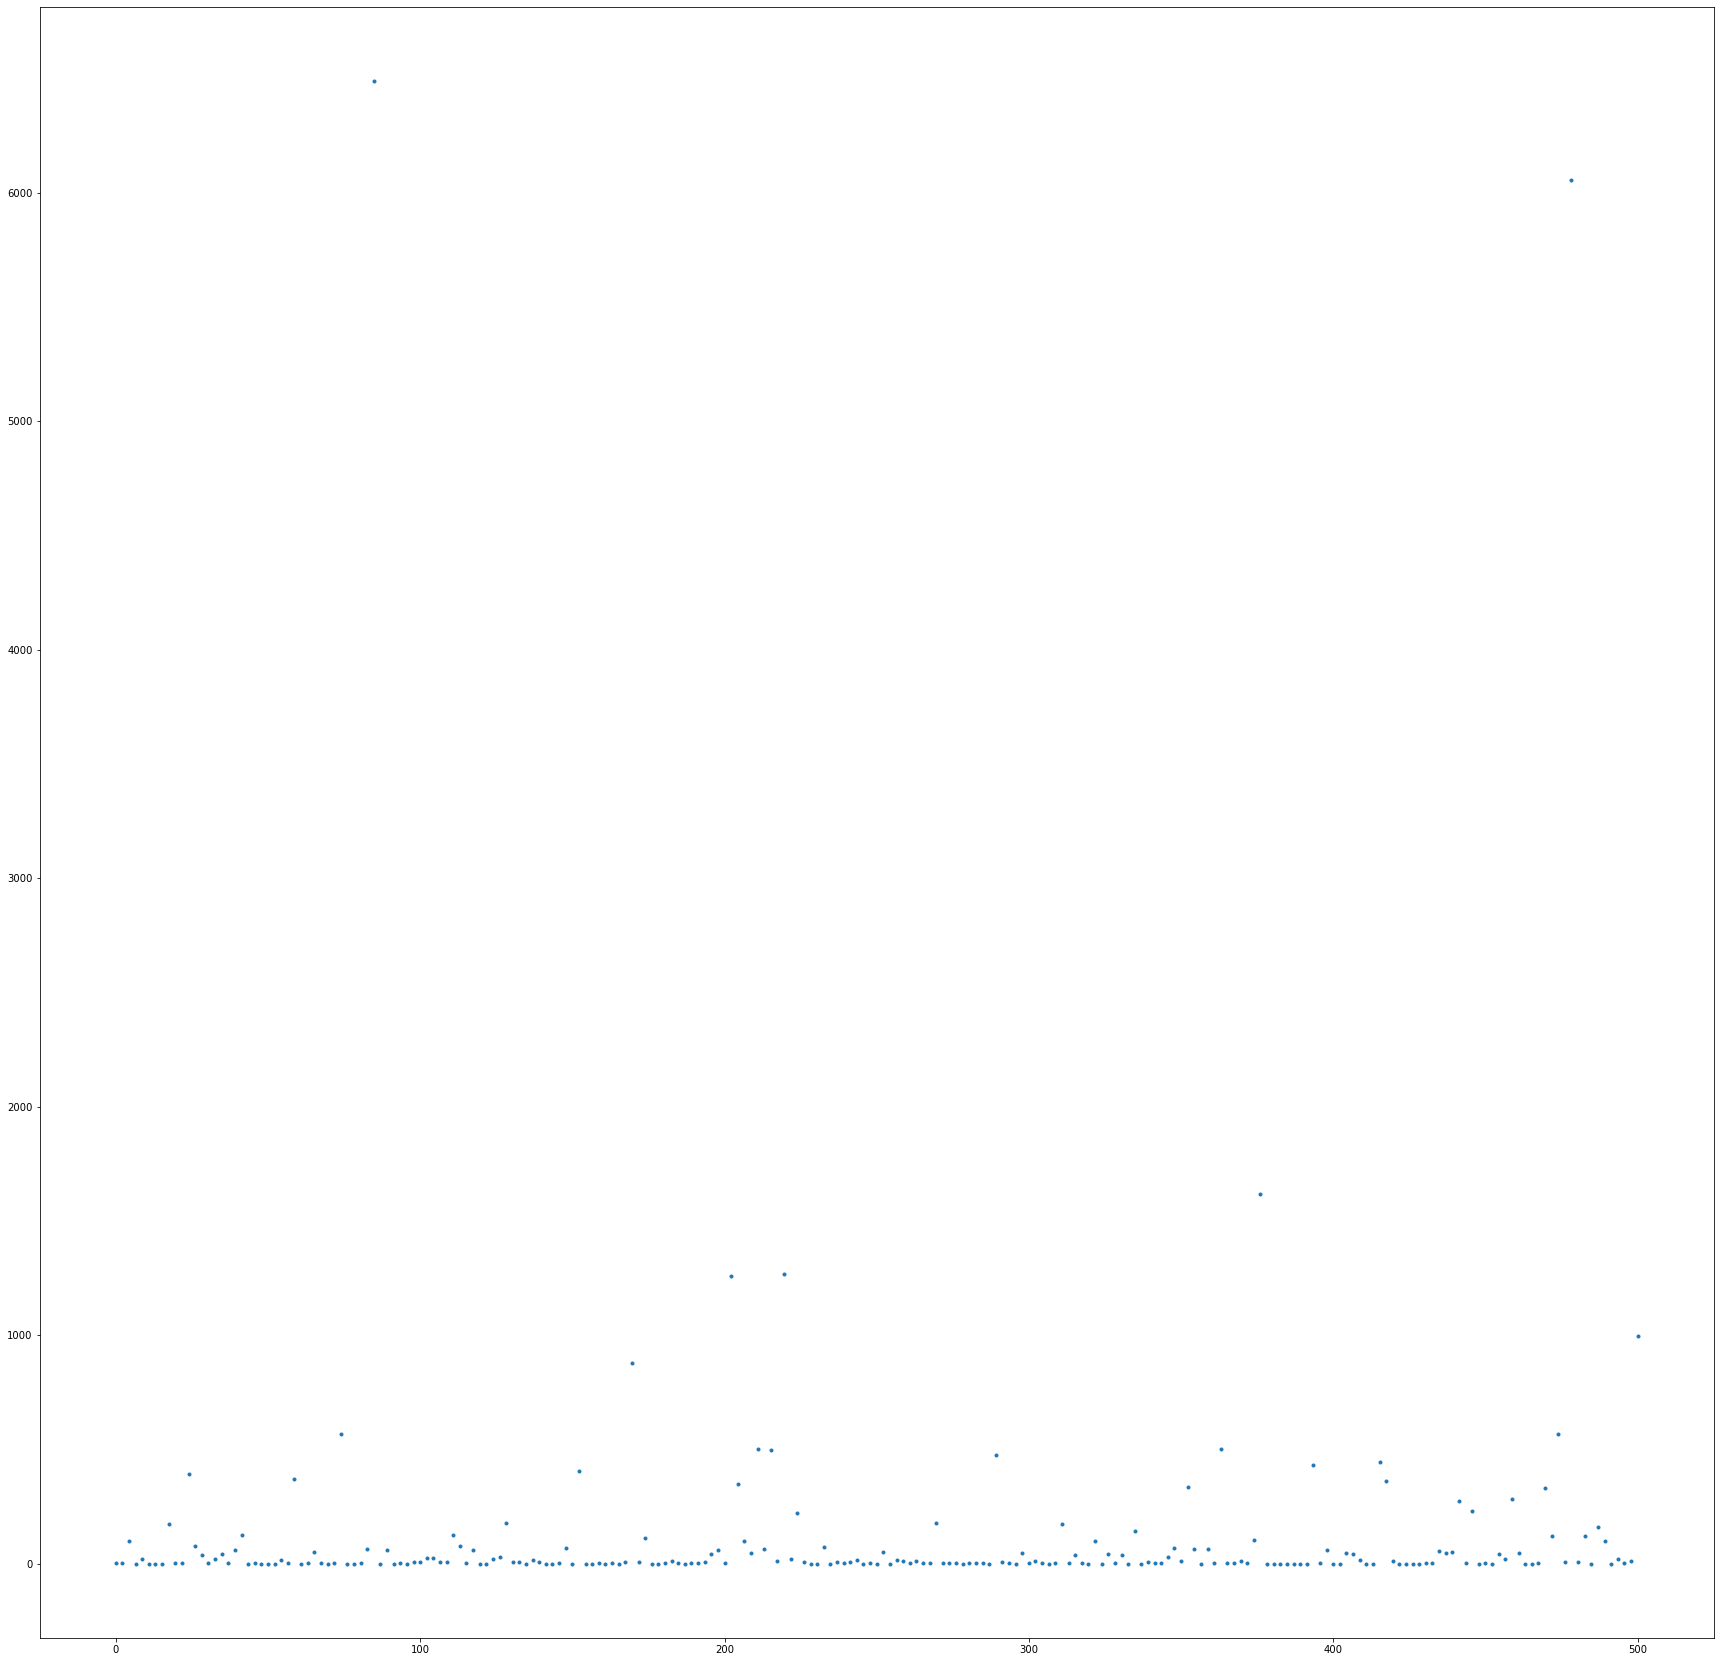

8


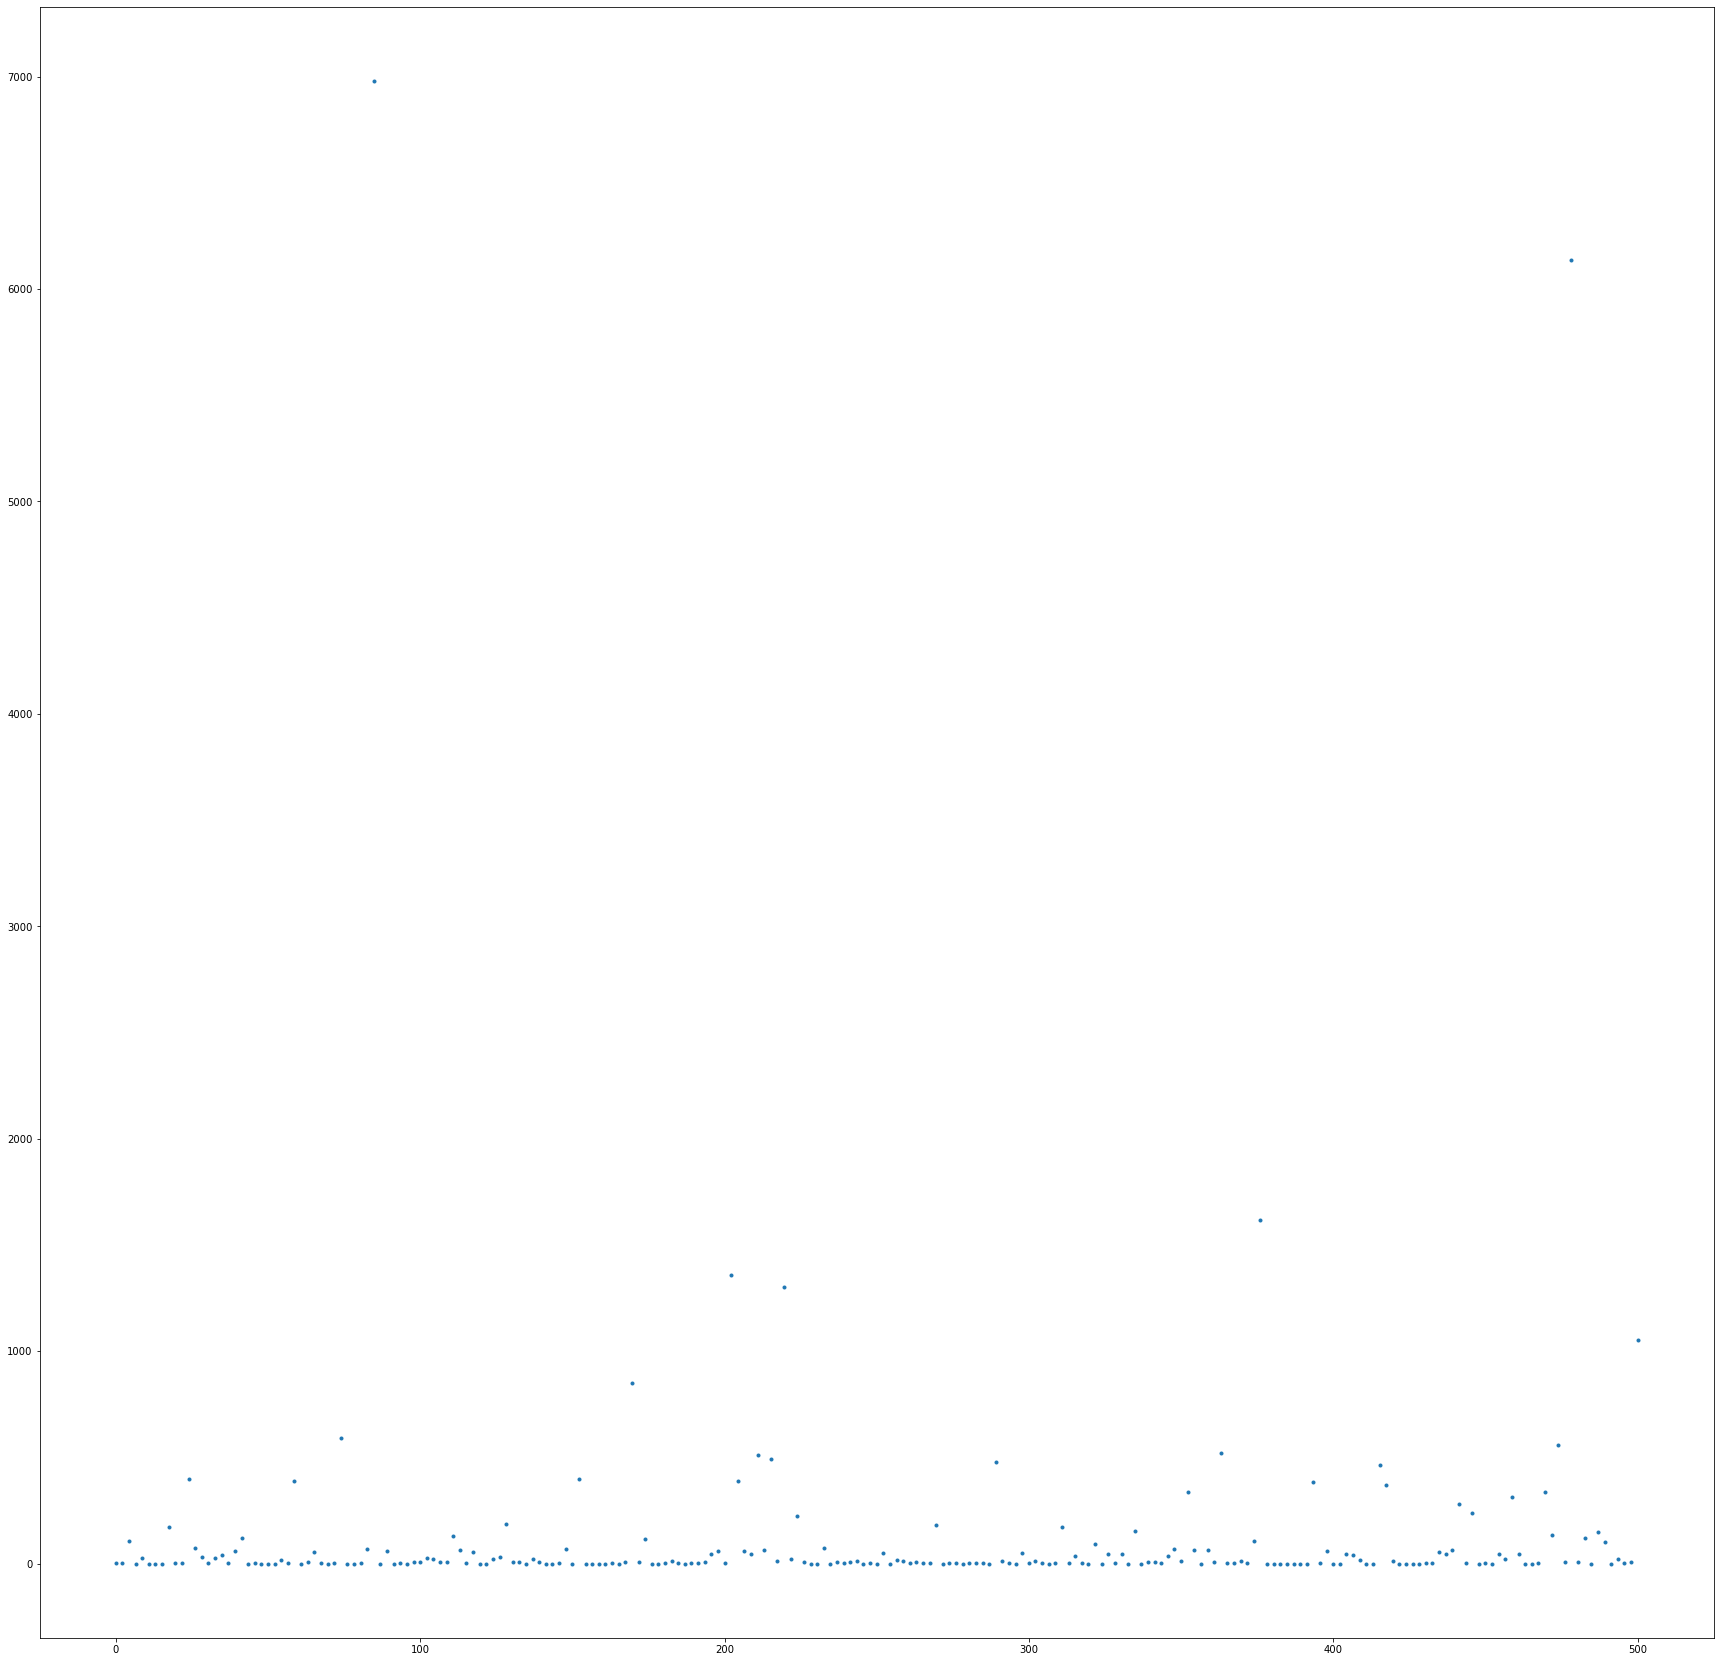

9


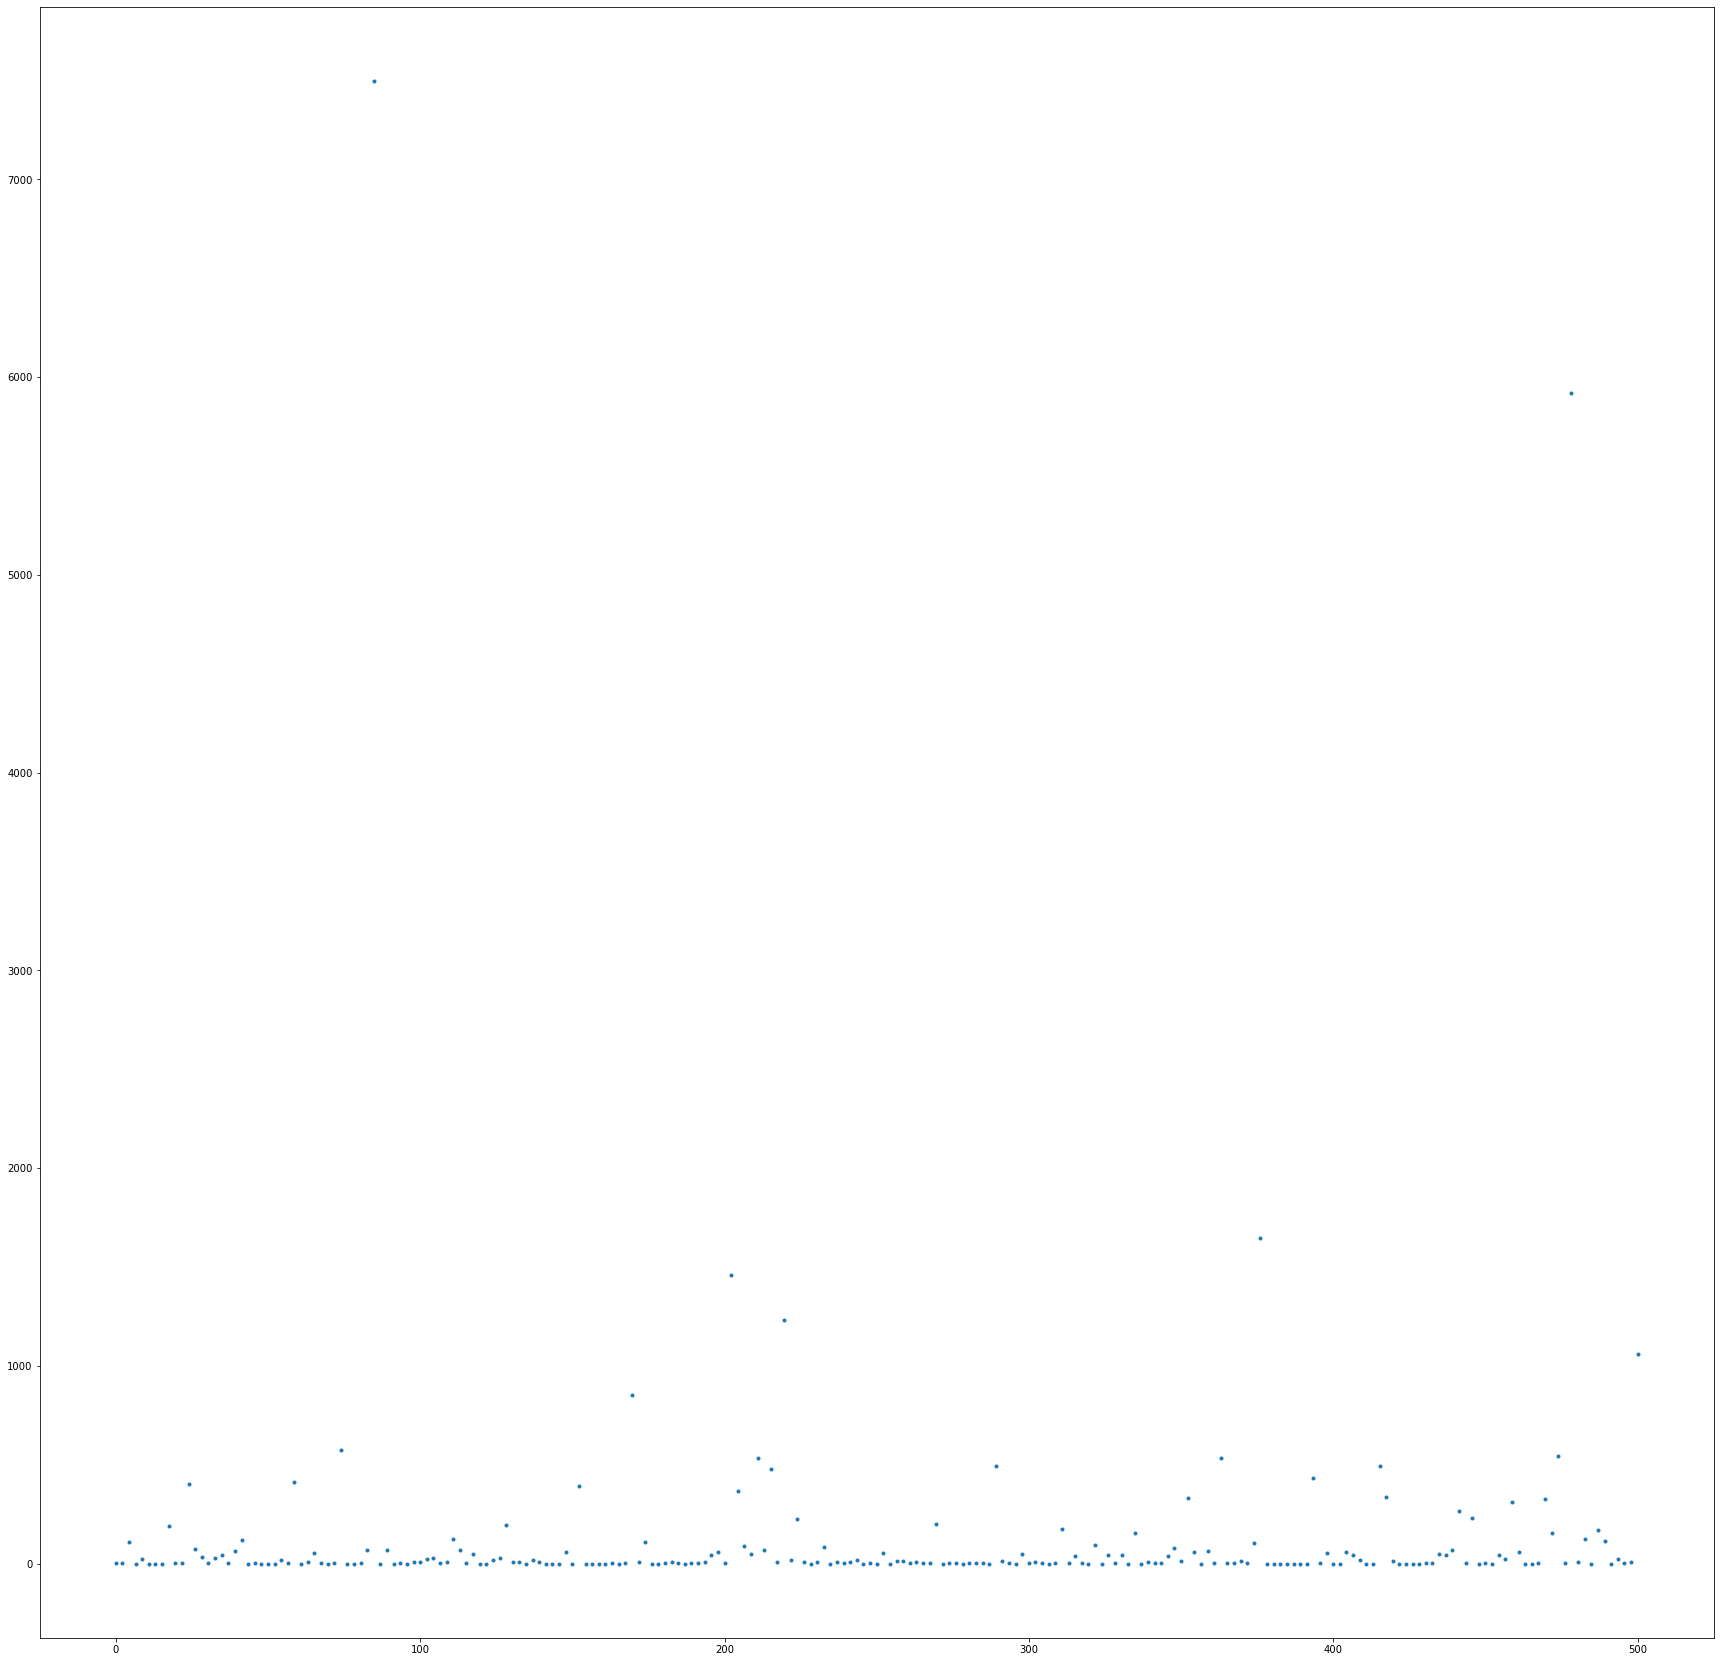

10


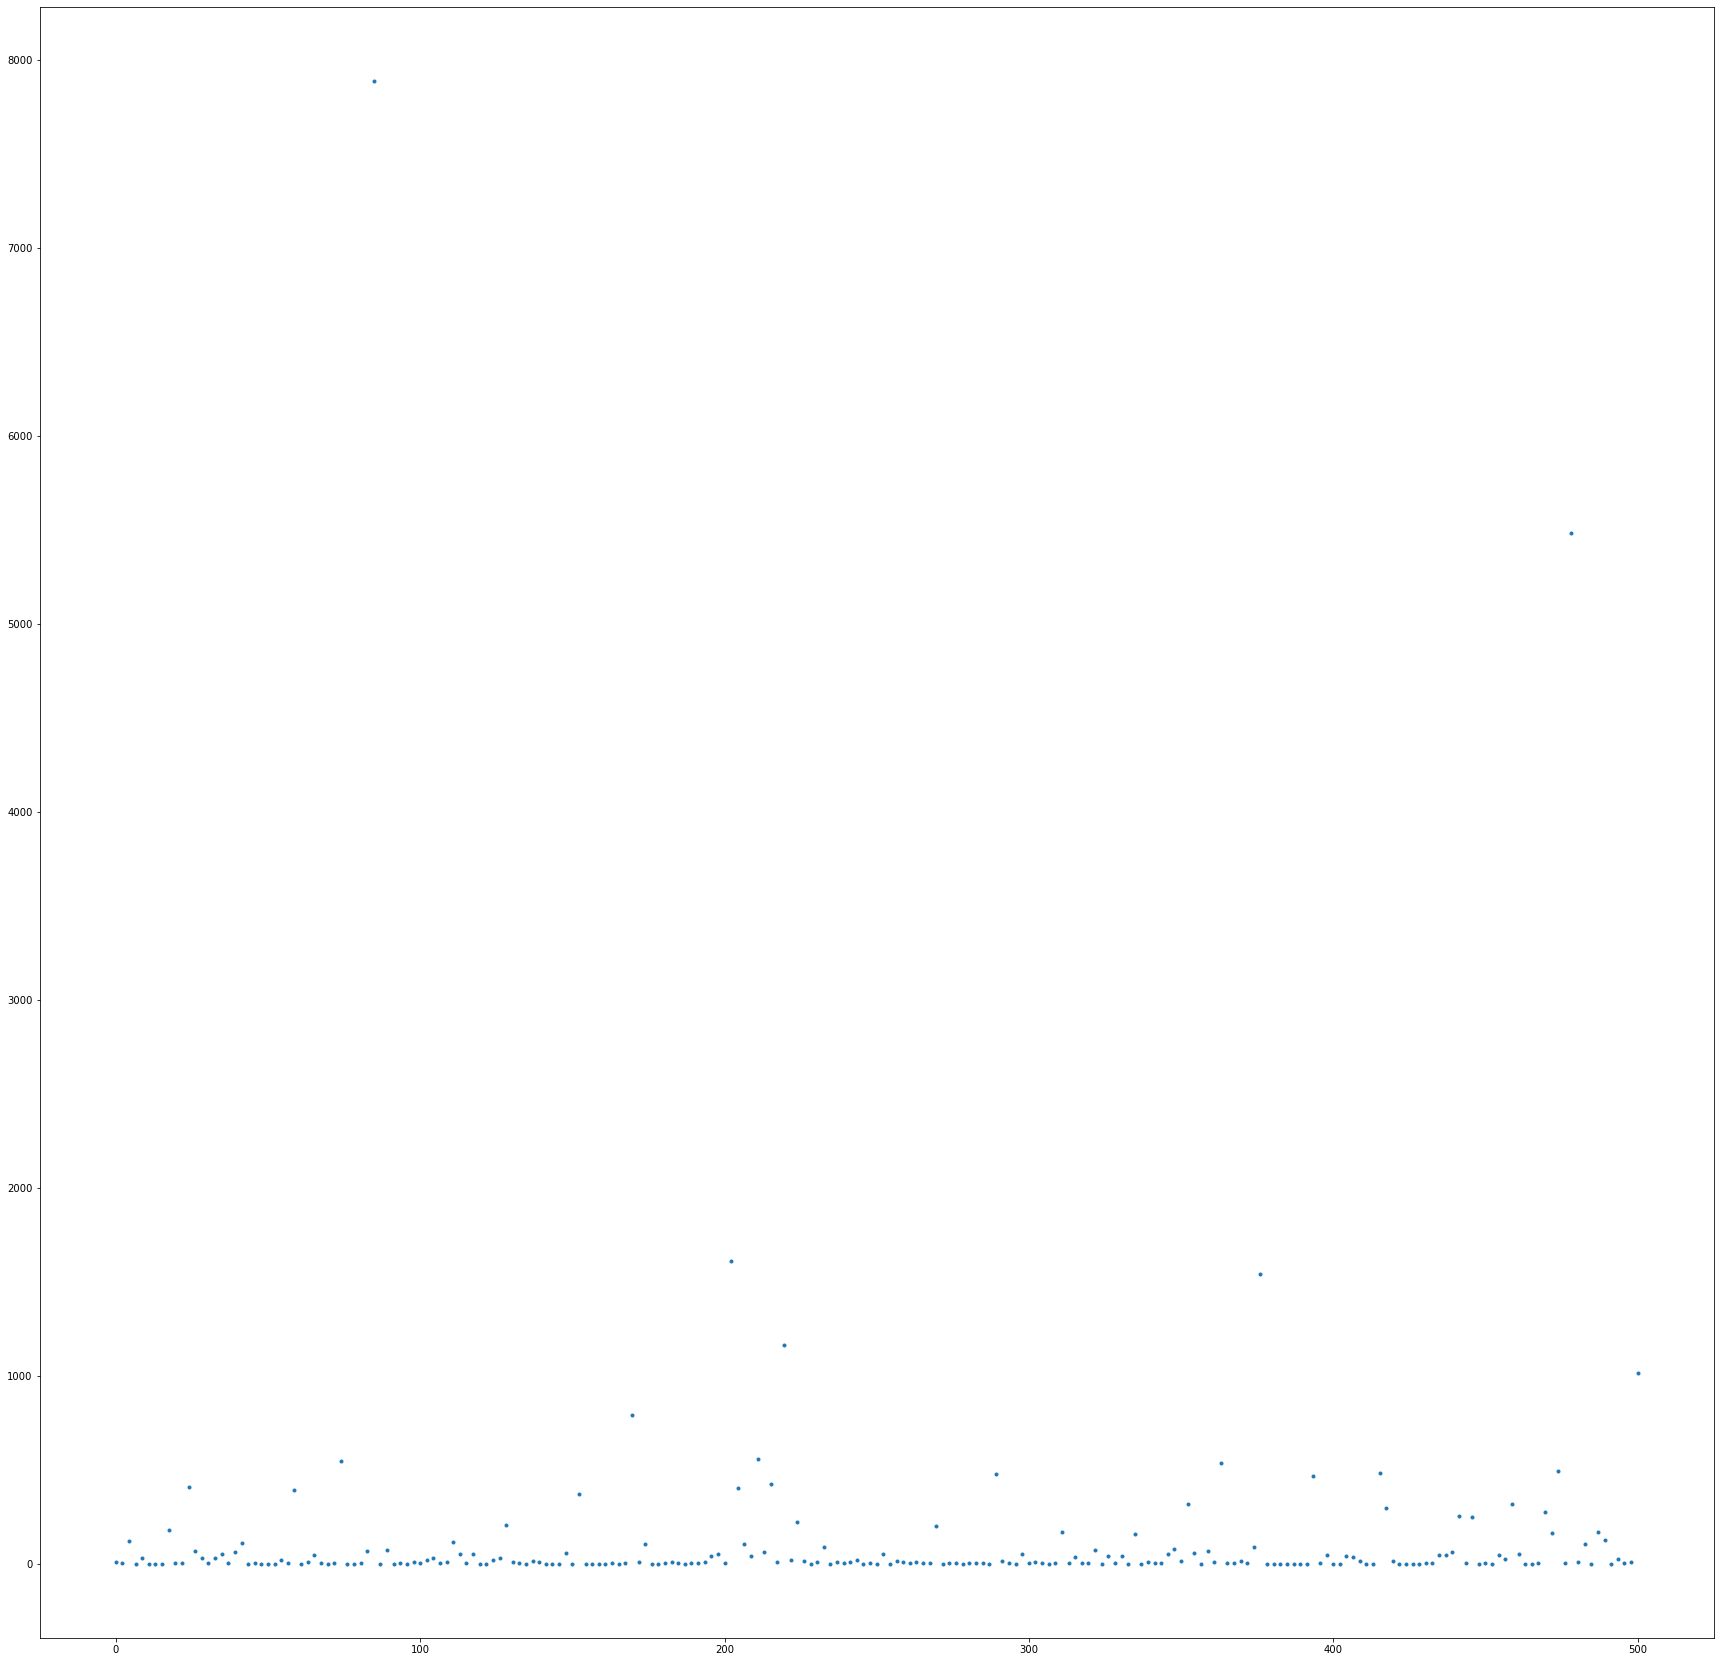

11


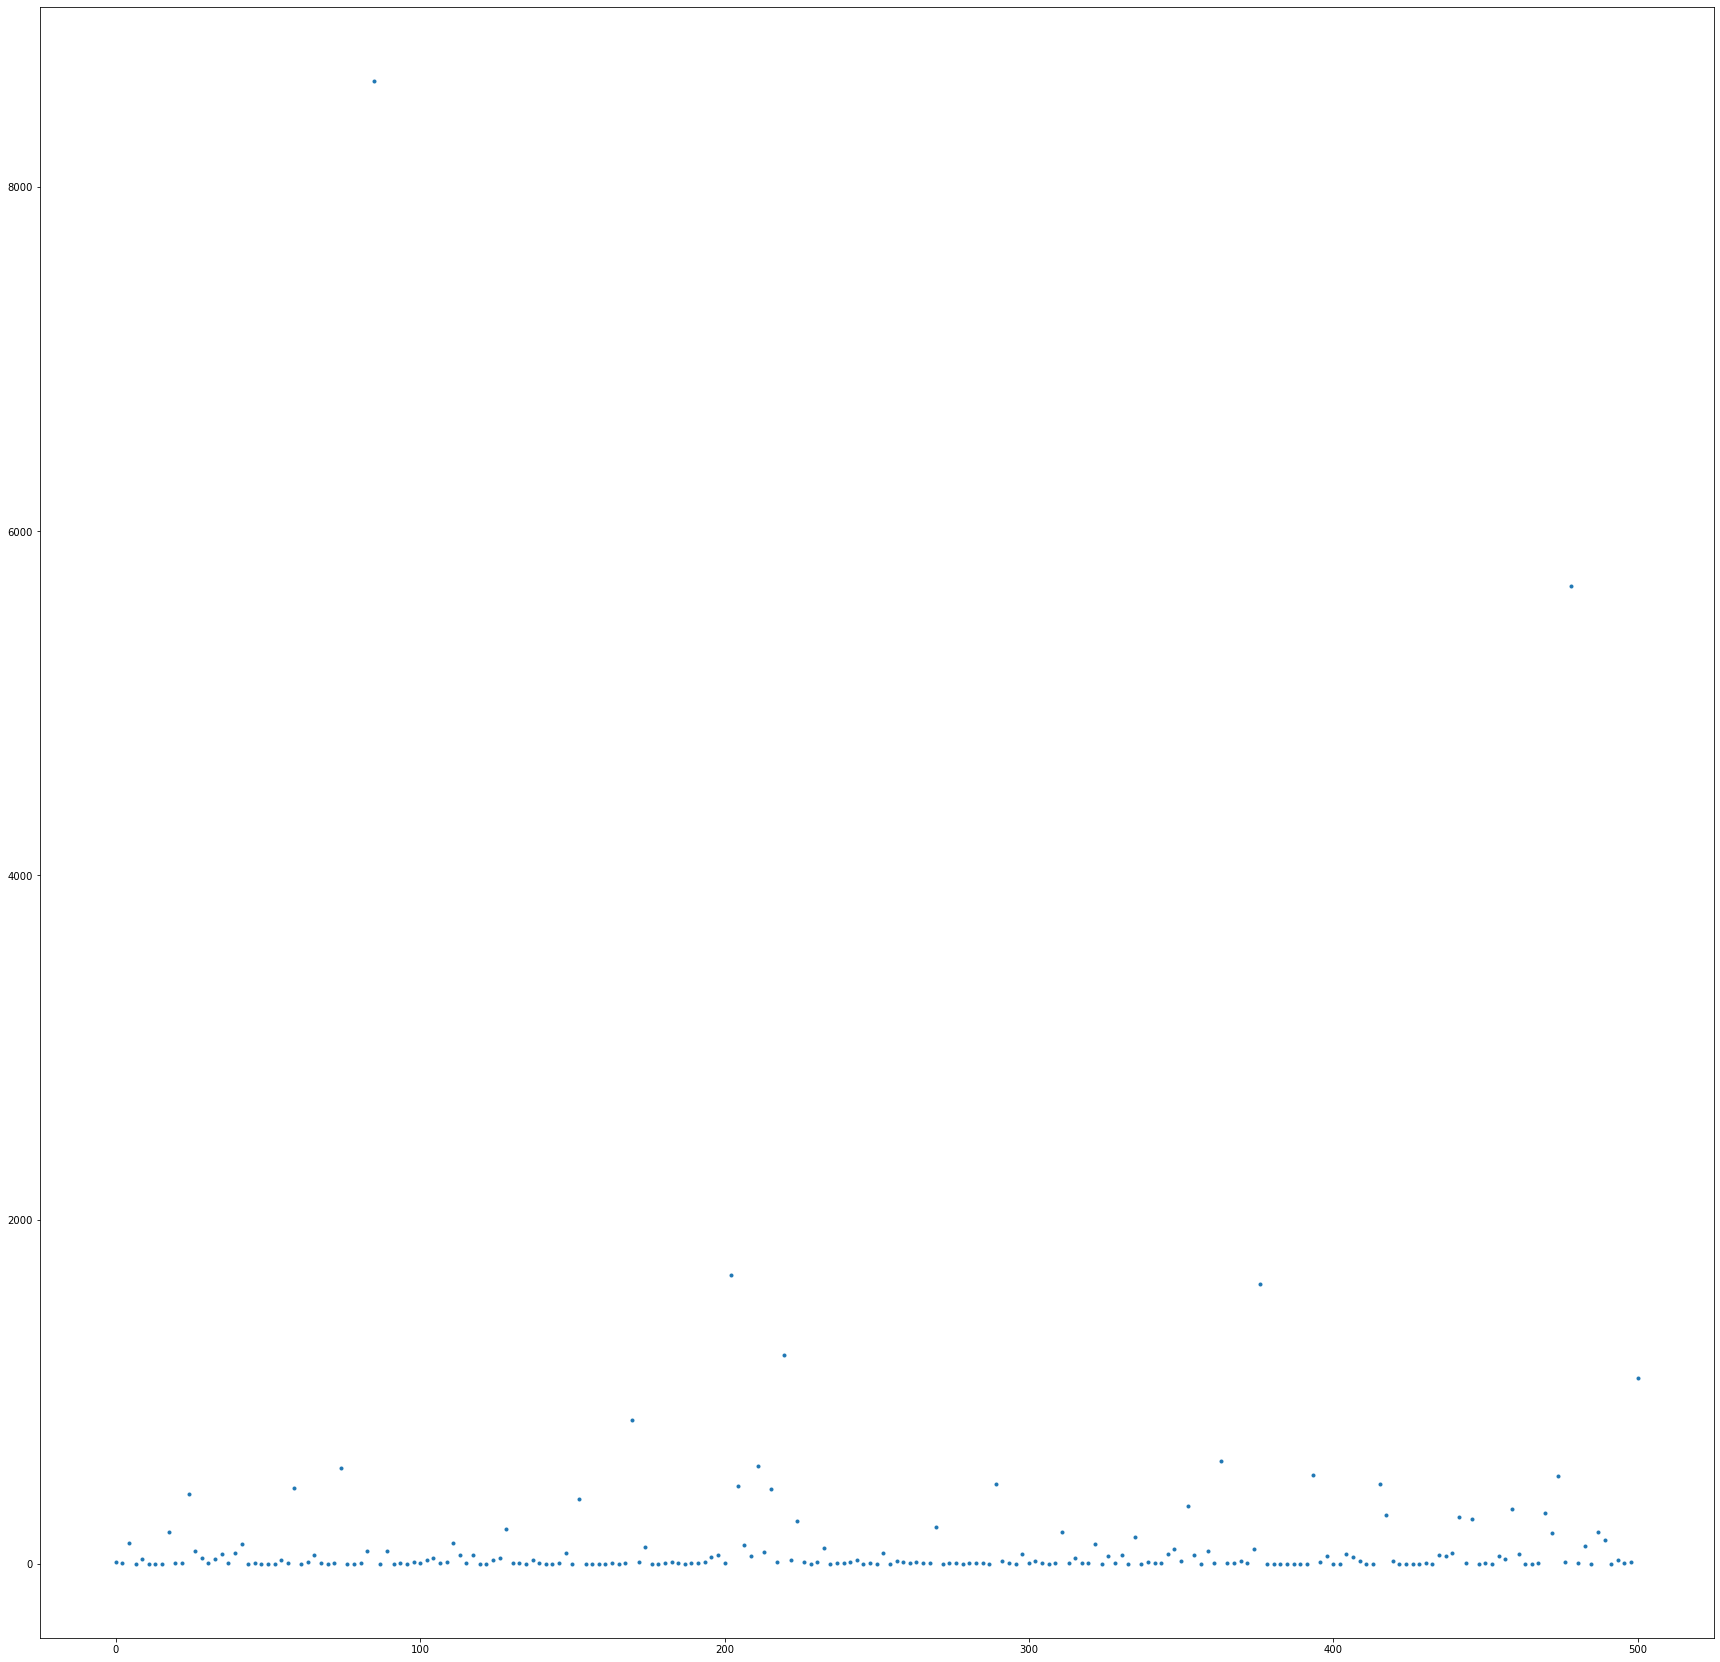

12


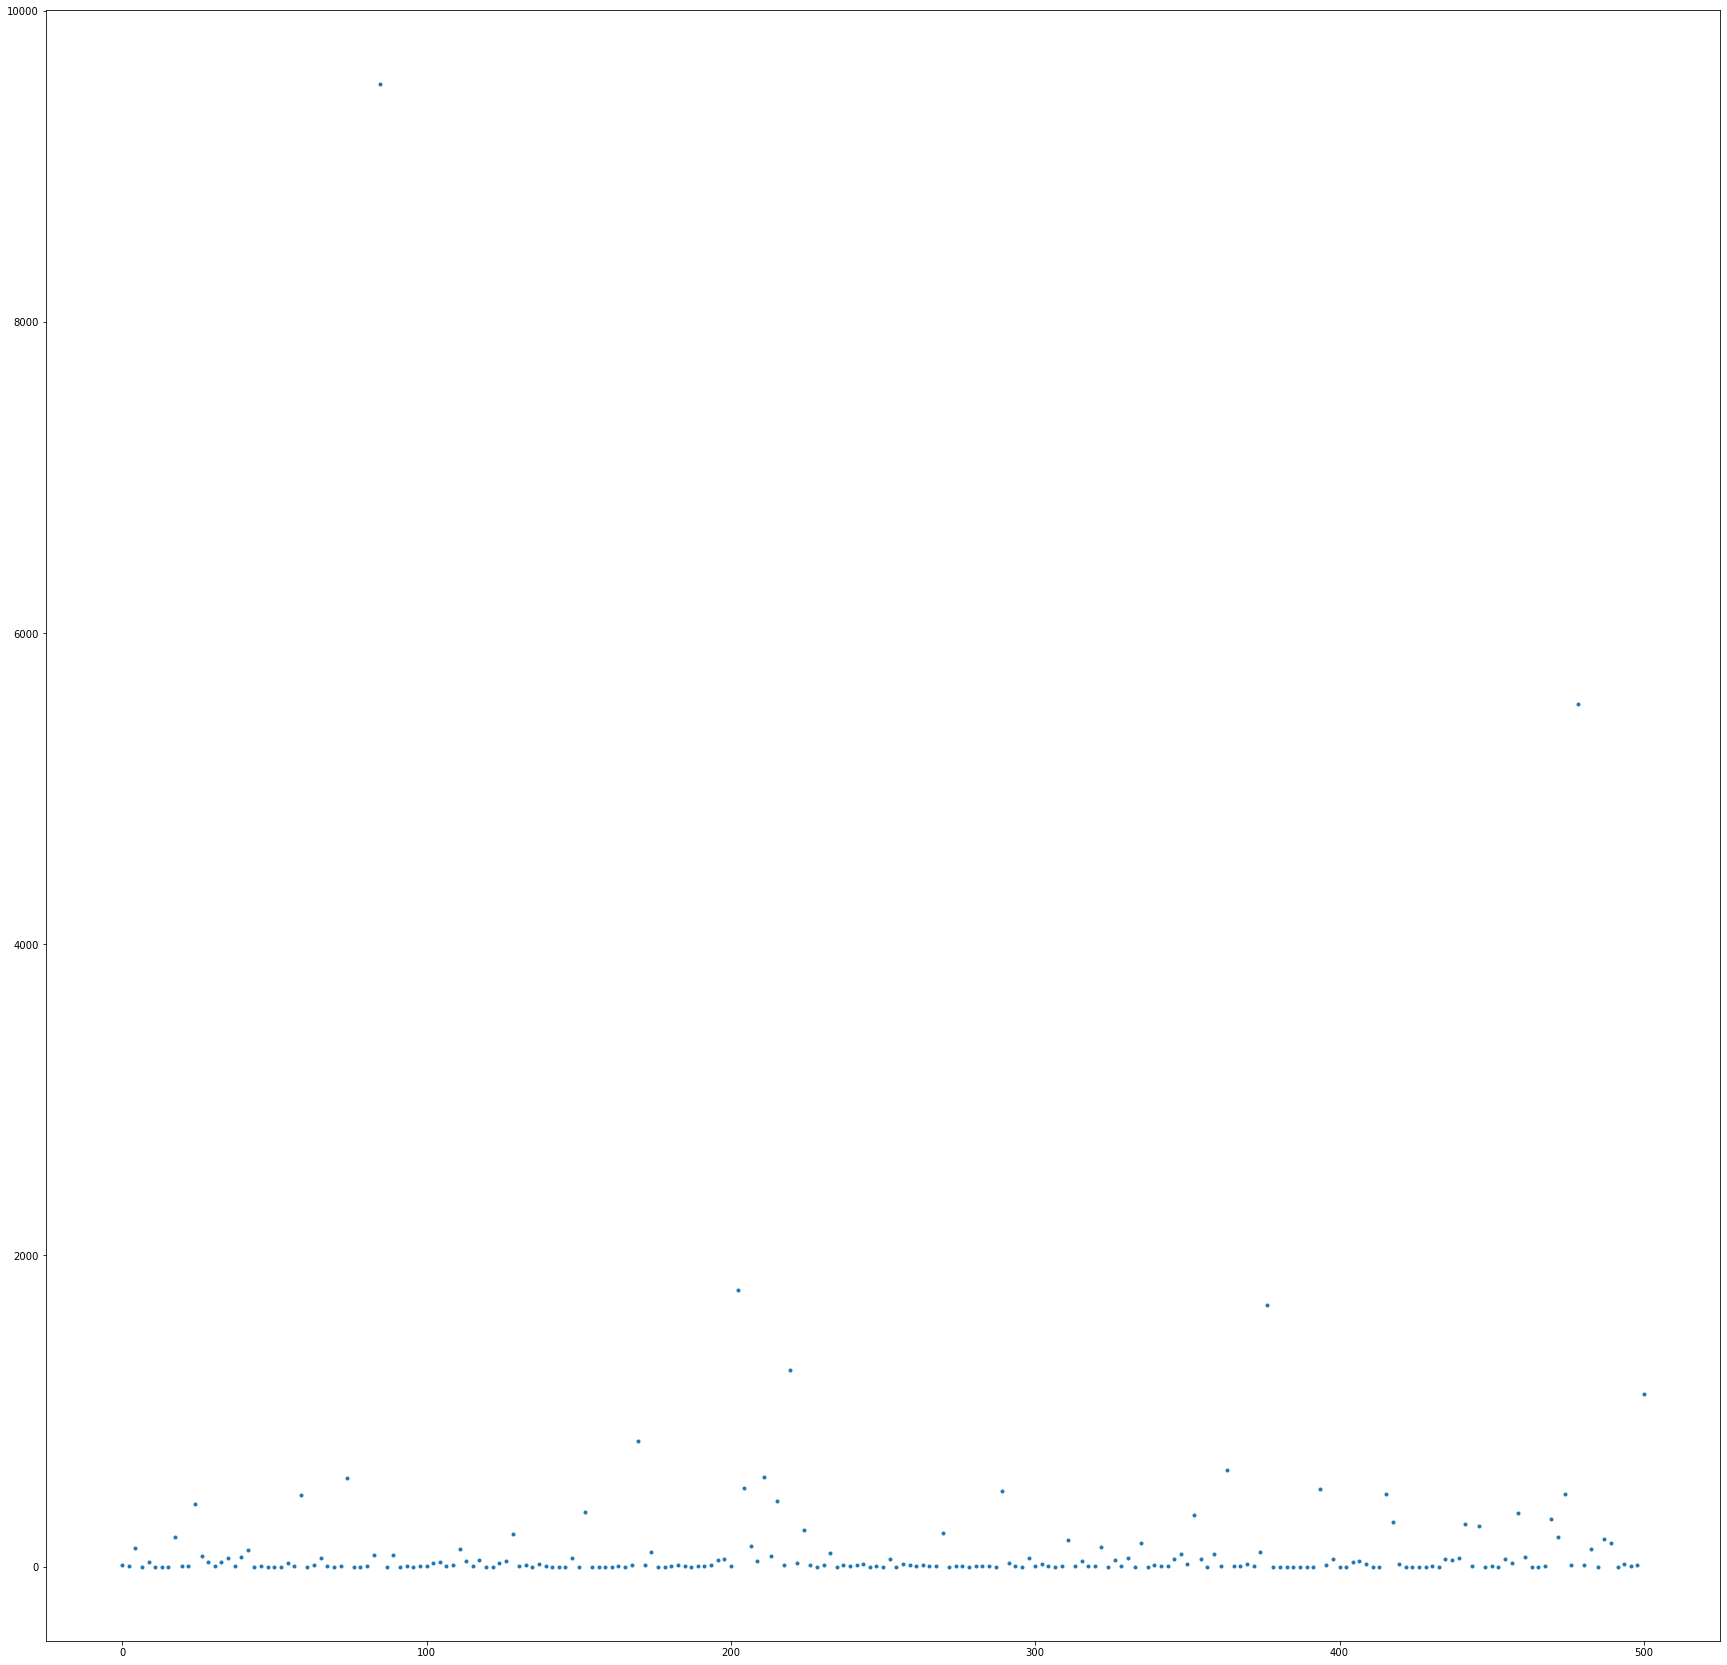

13


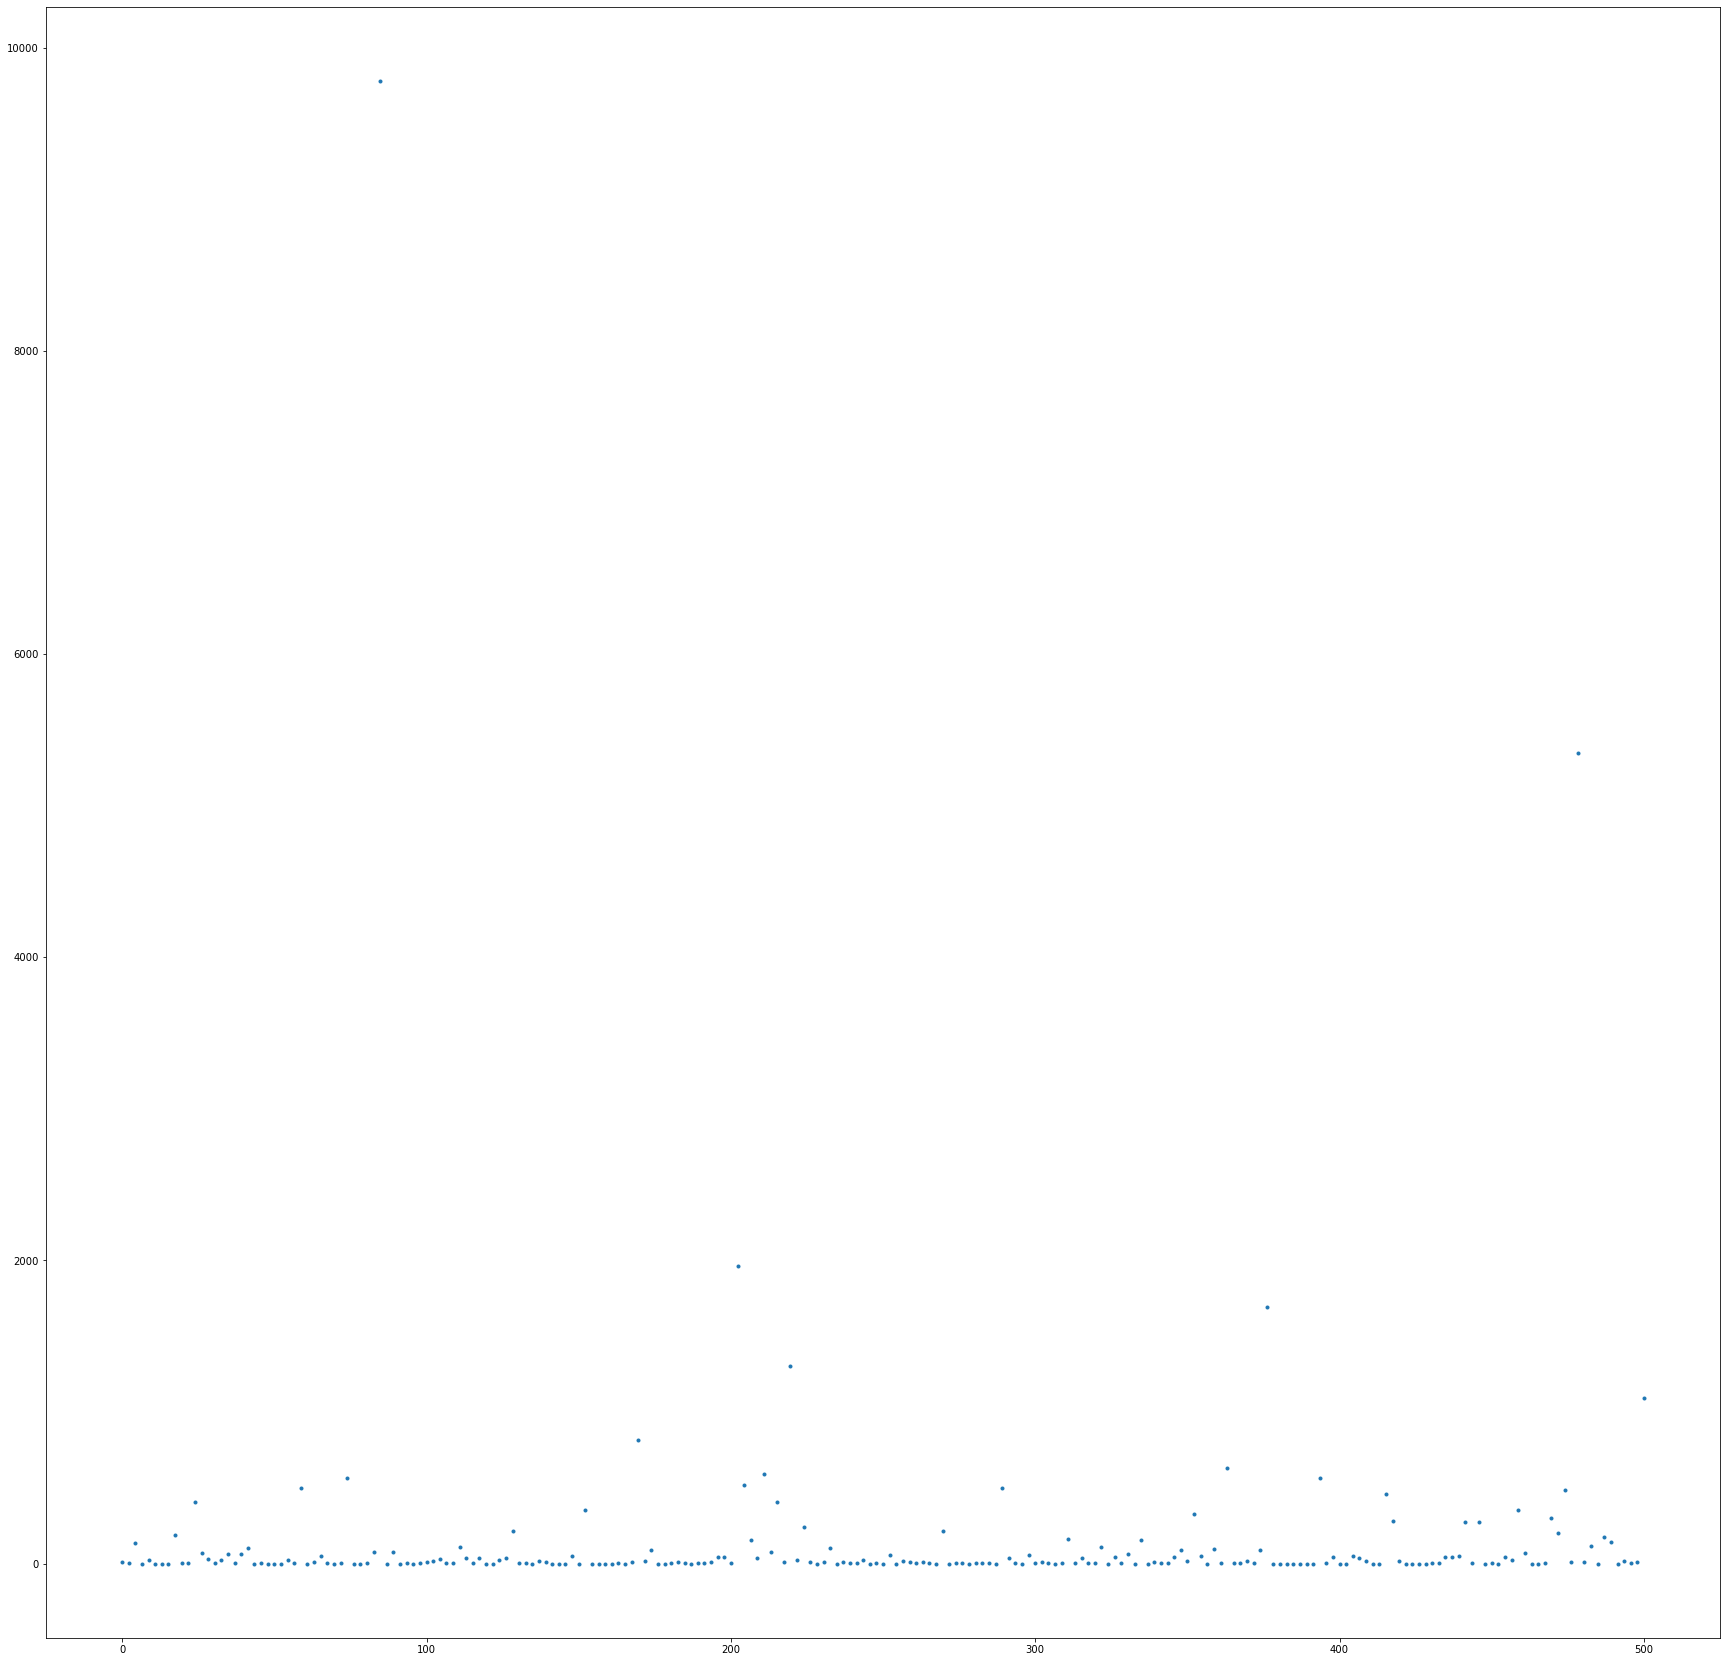

14


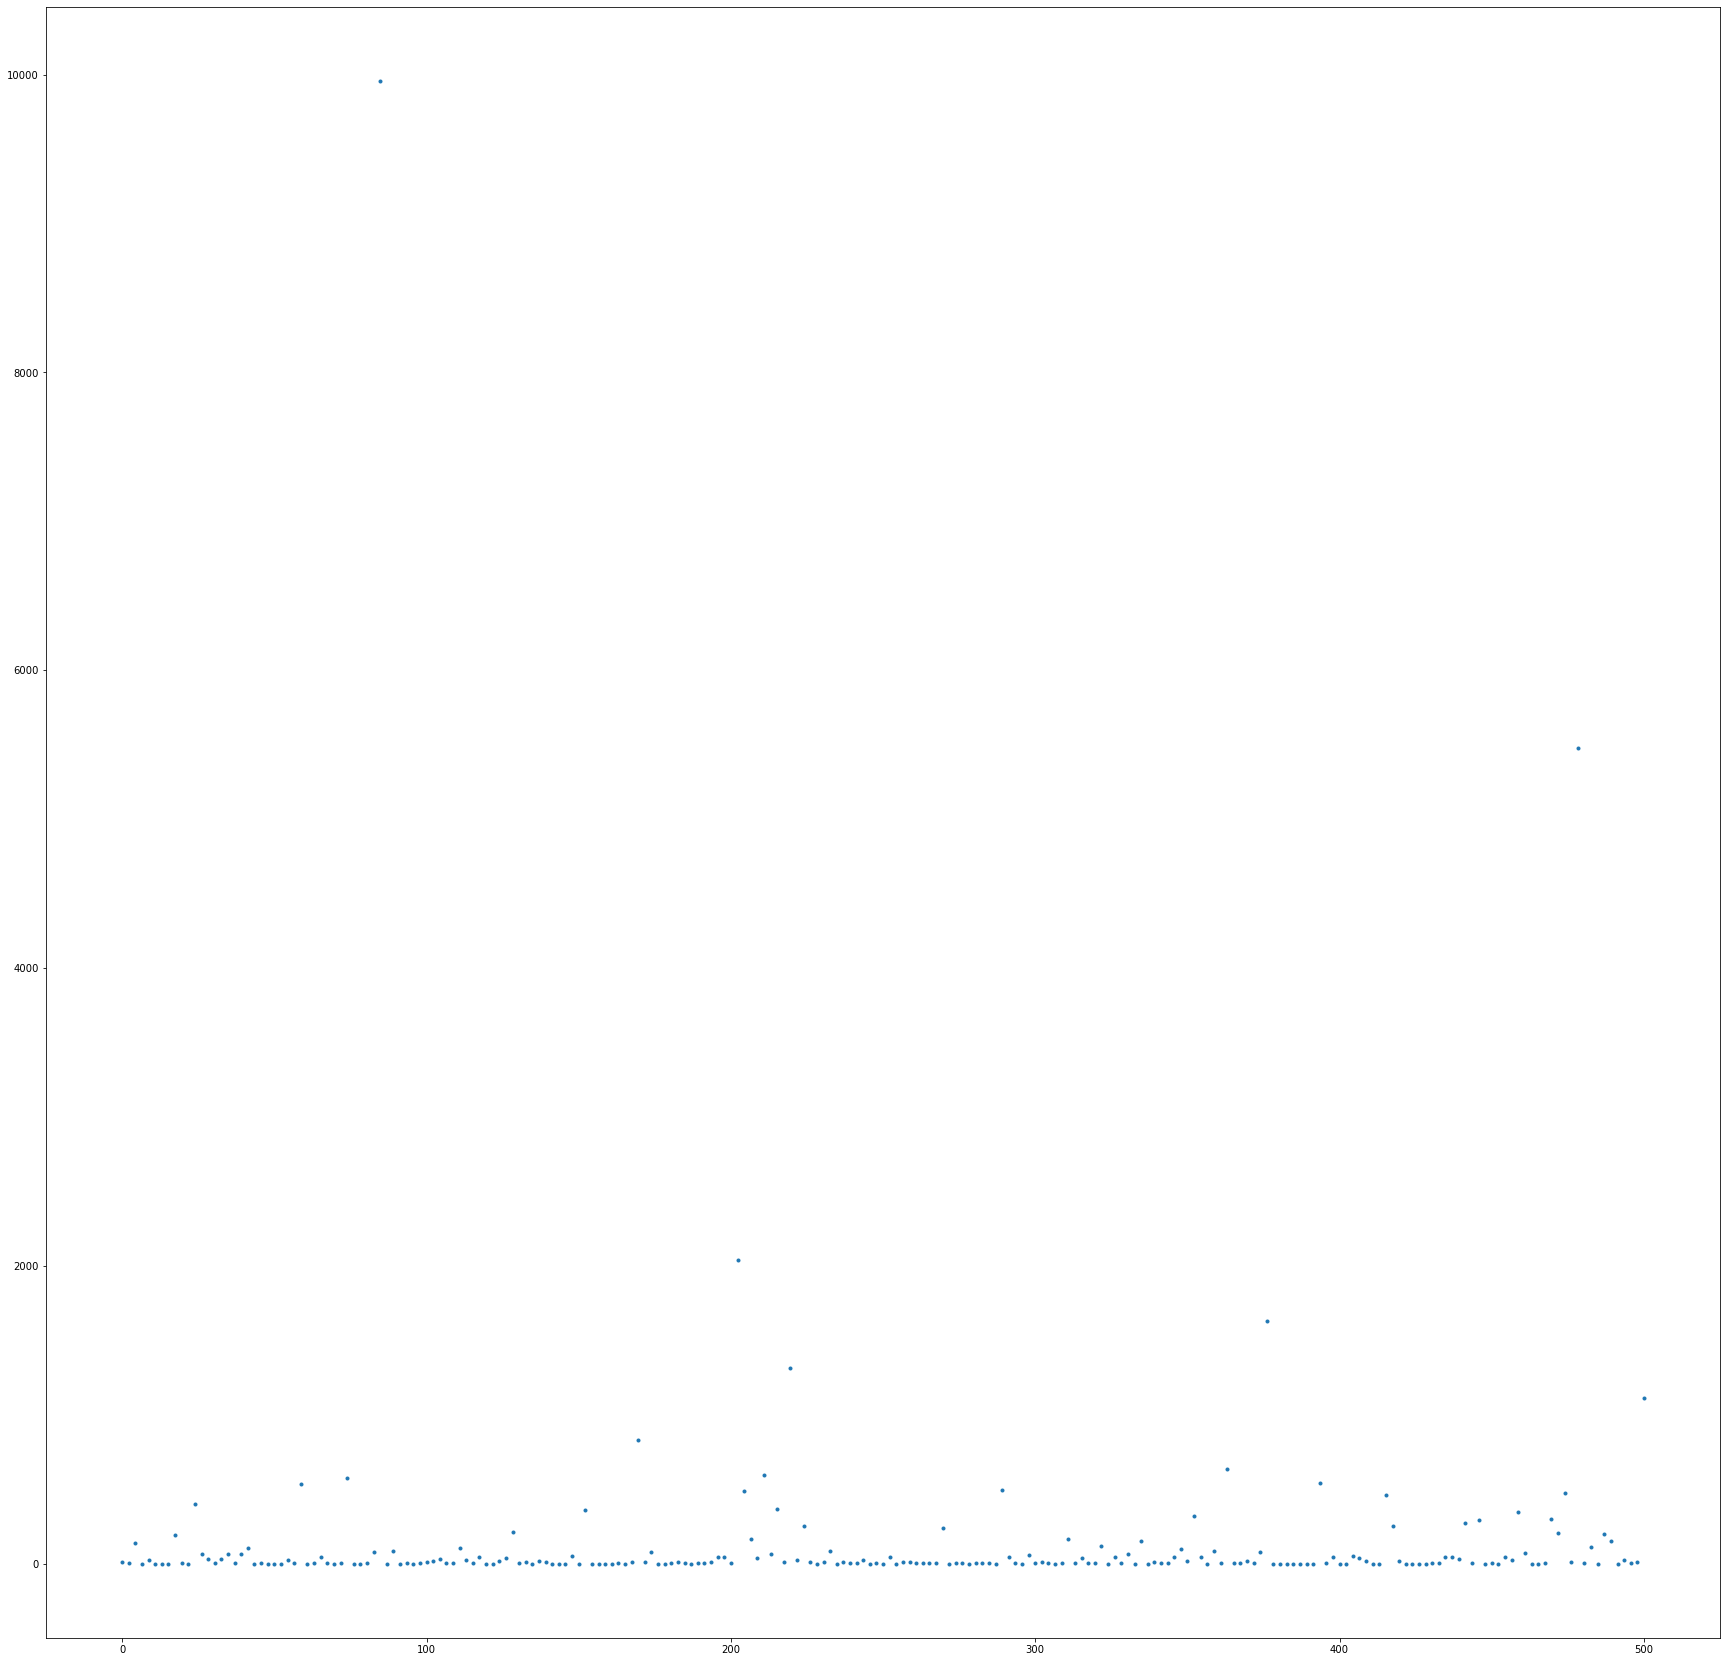

15


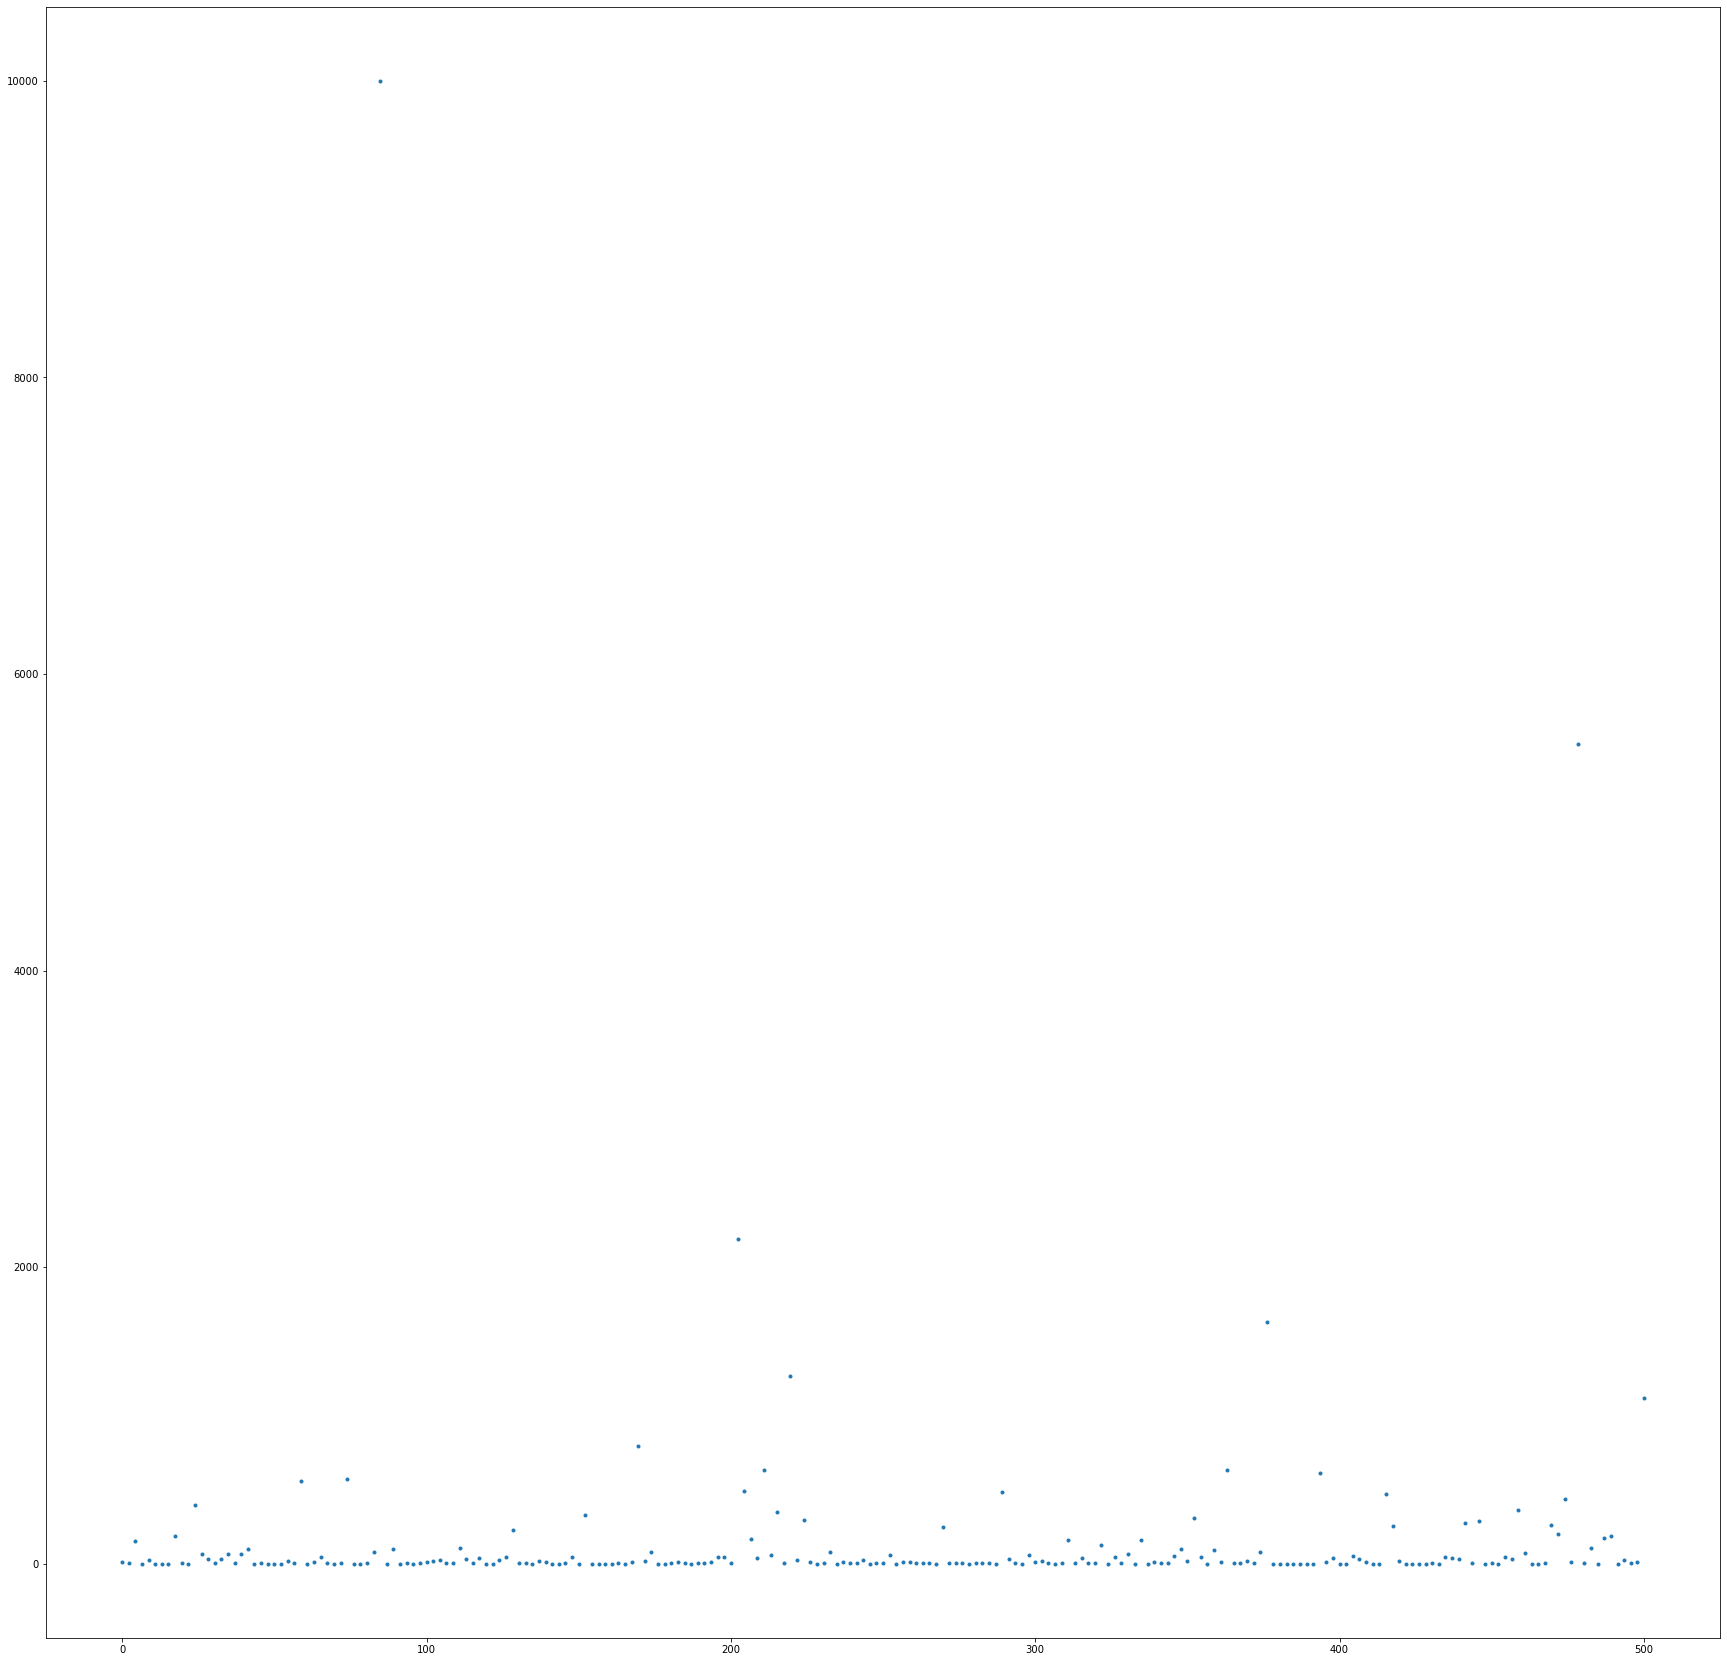

16


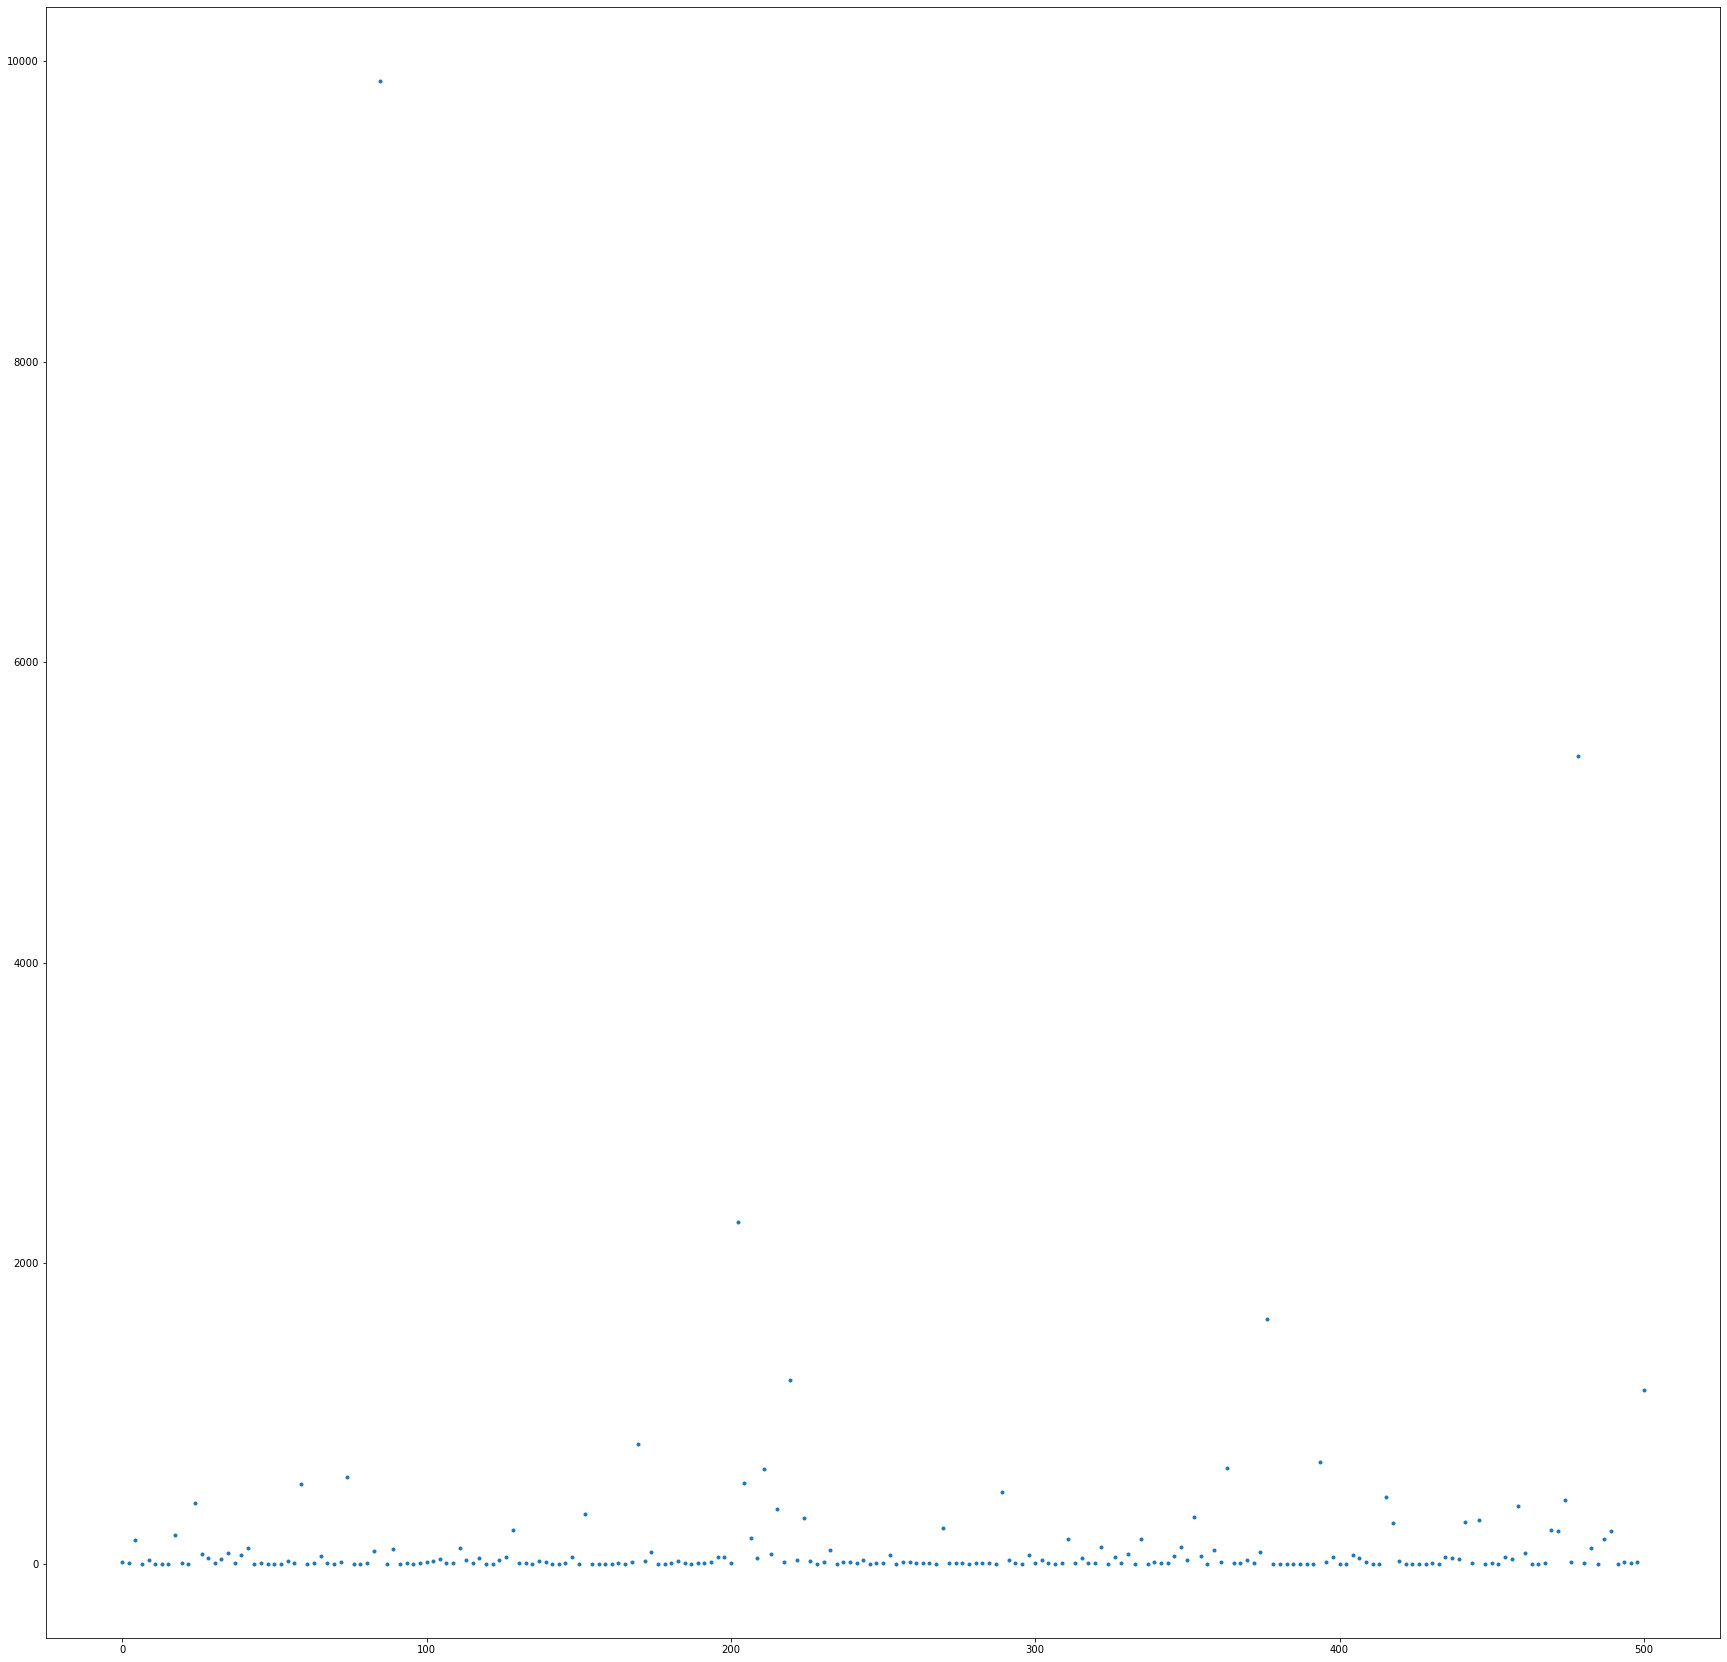

17


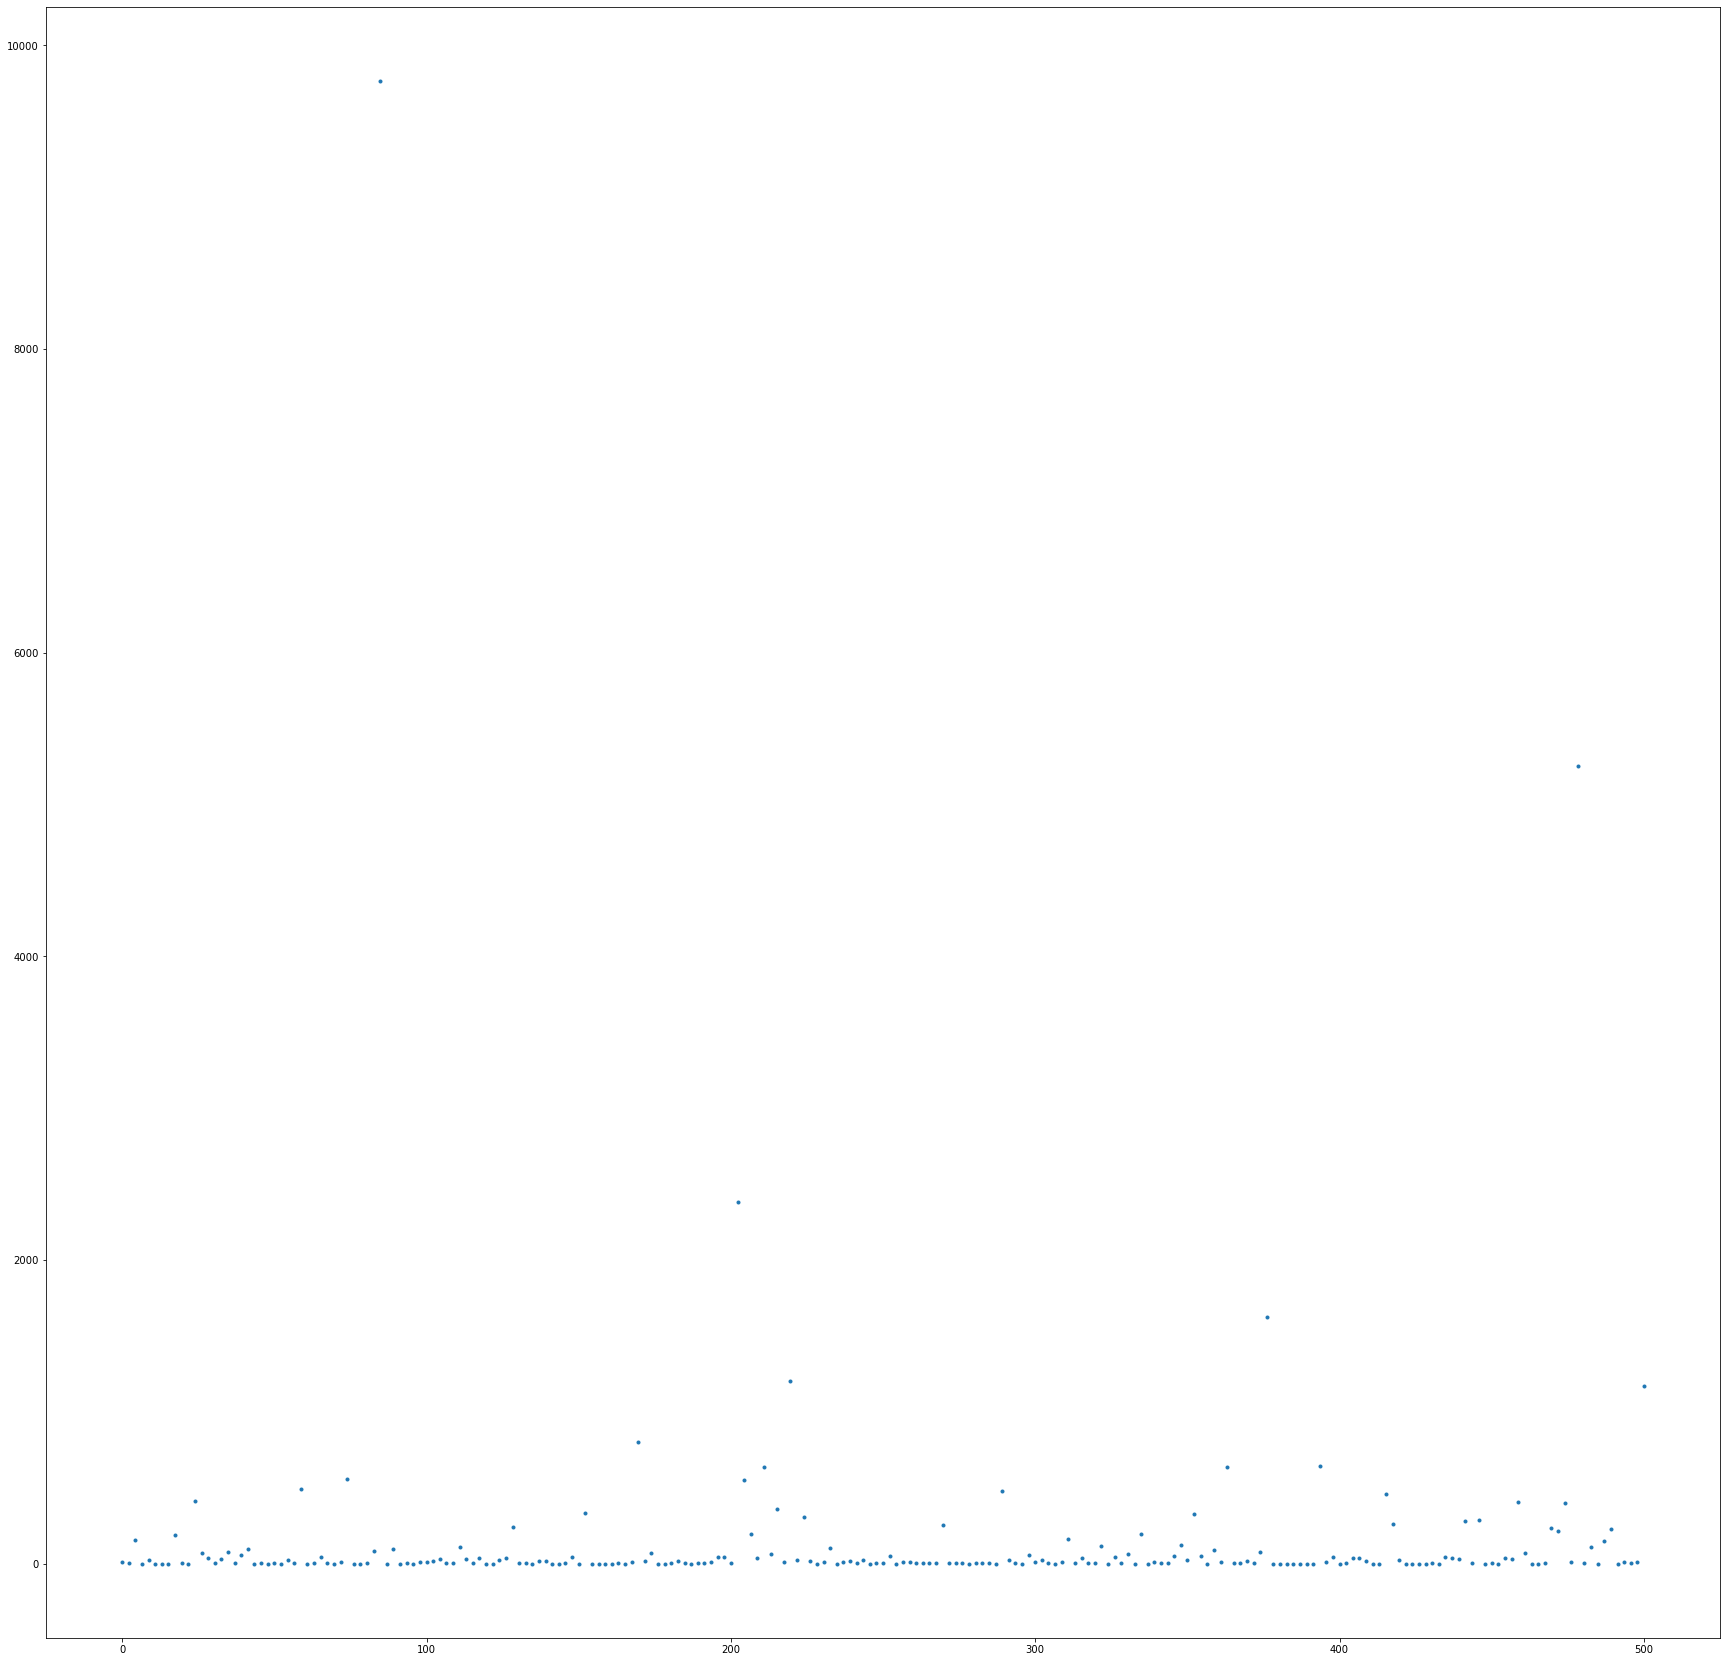

18


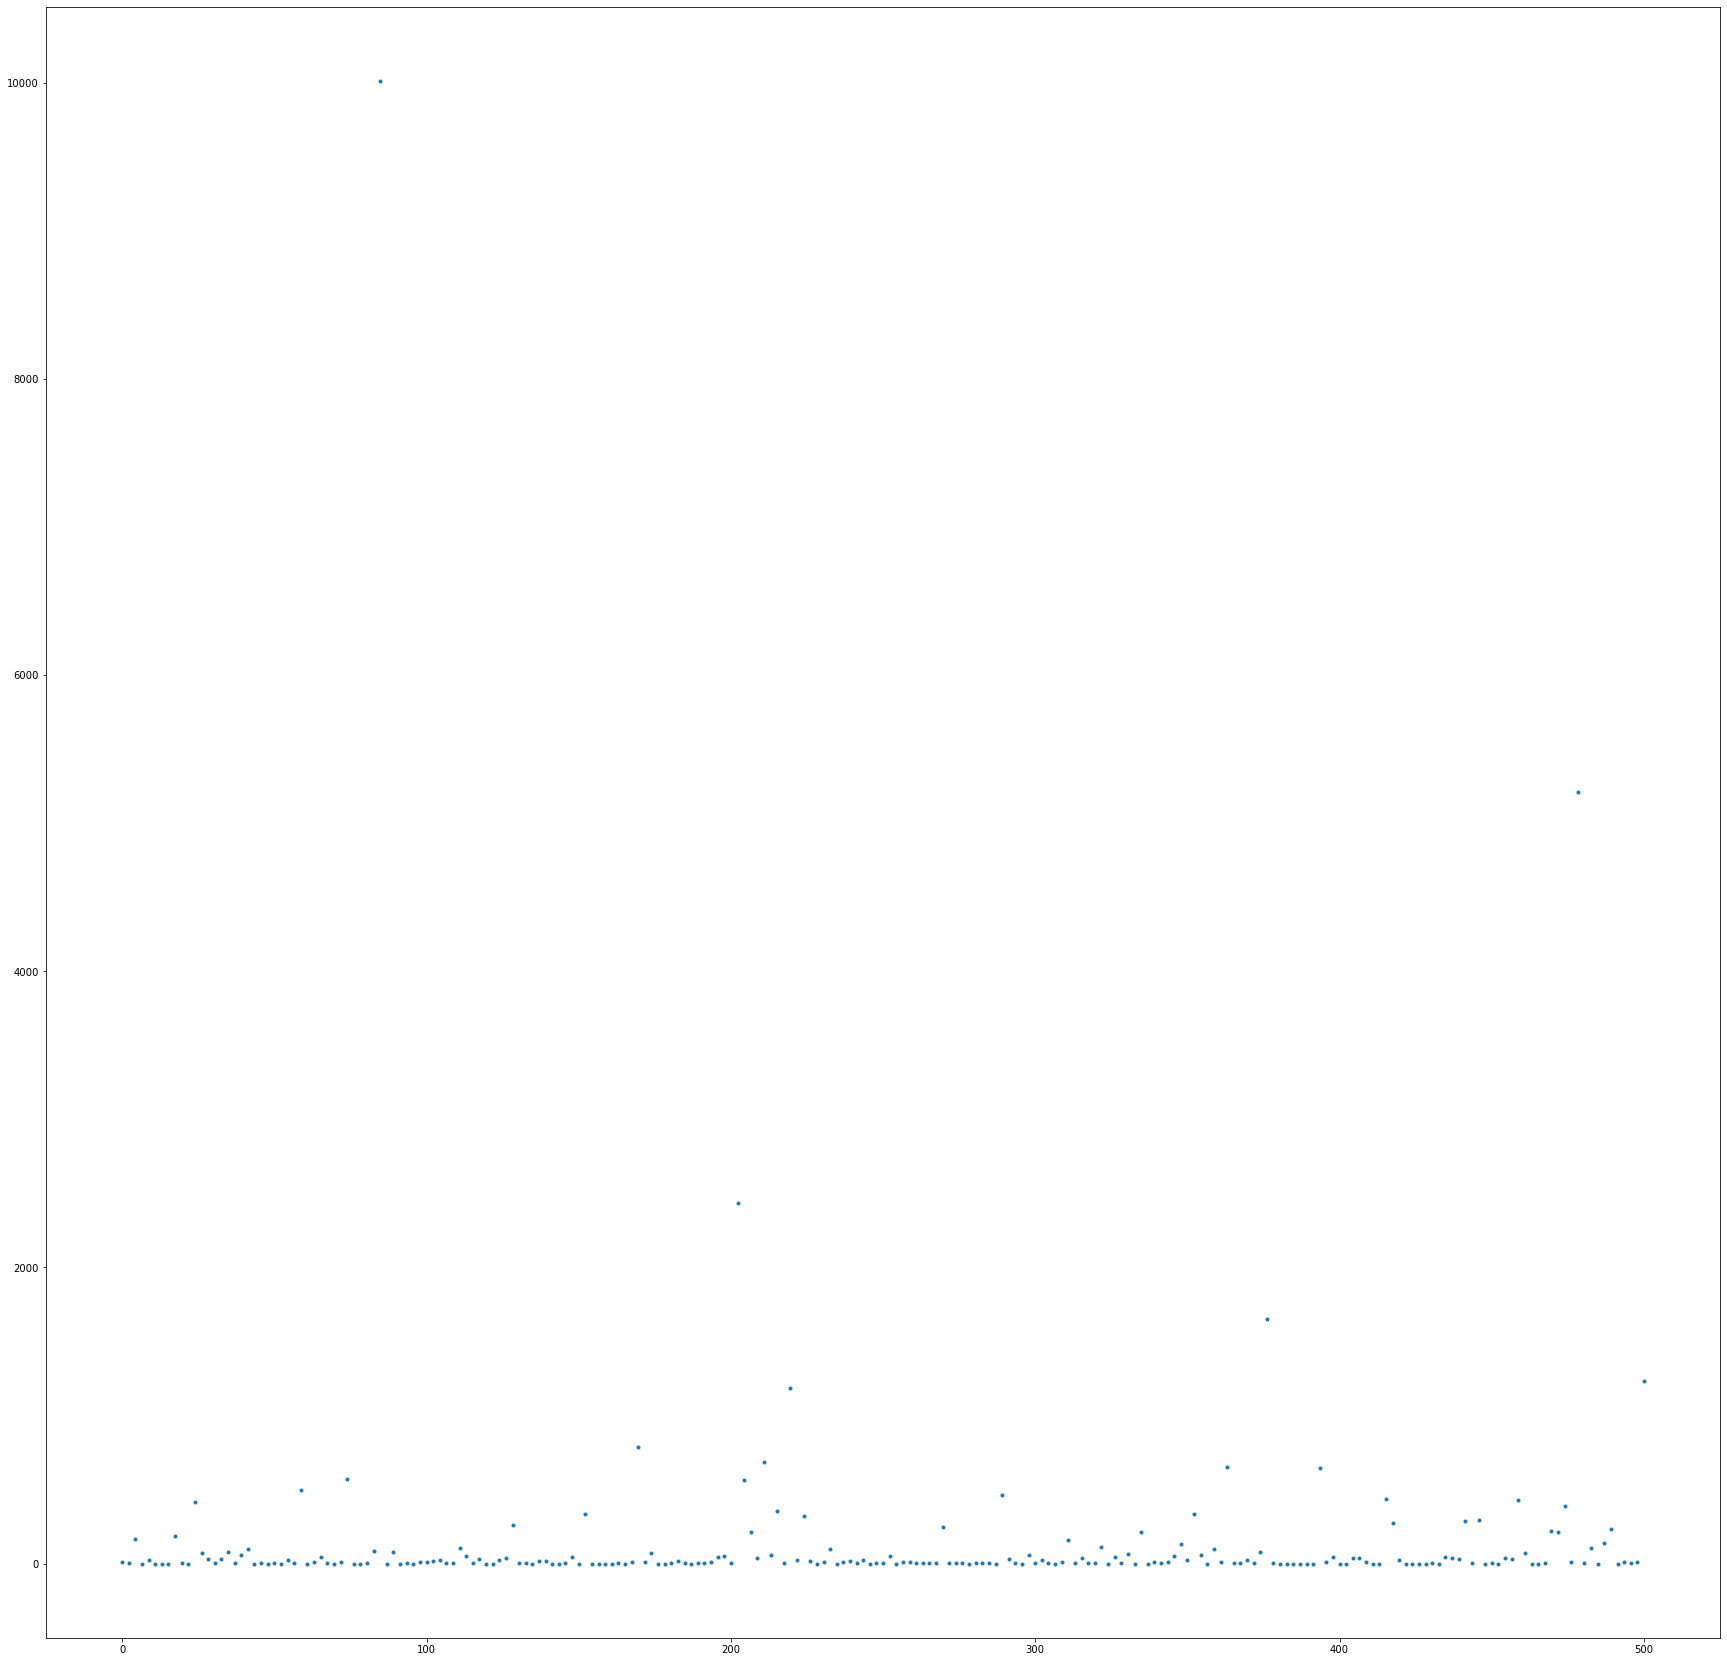

19


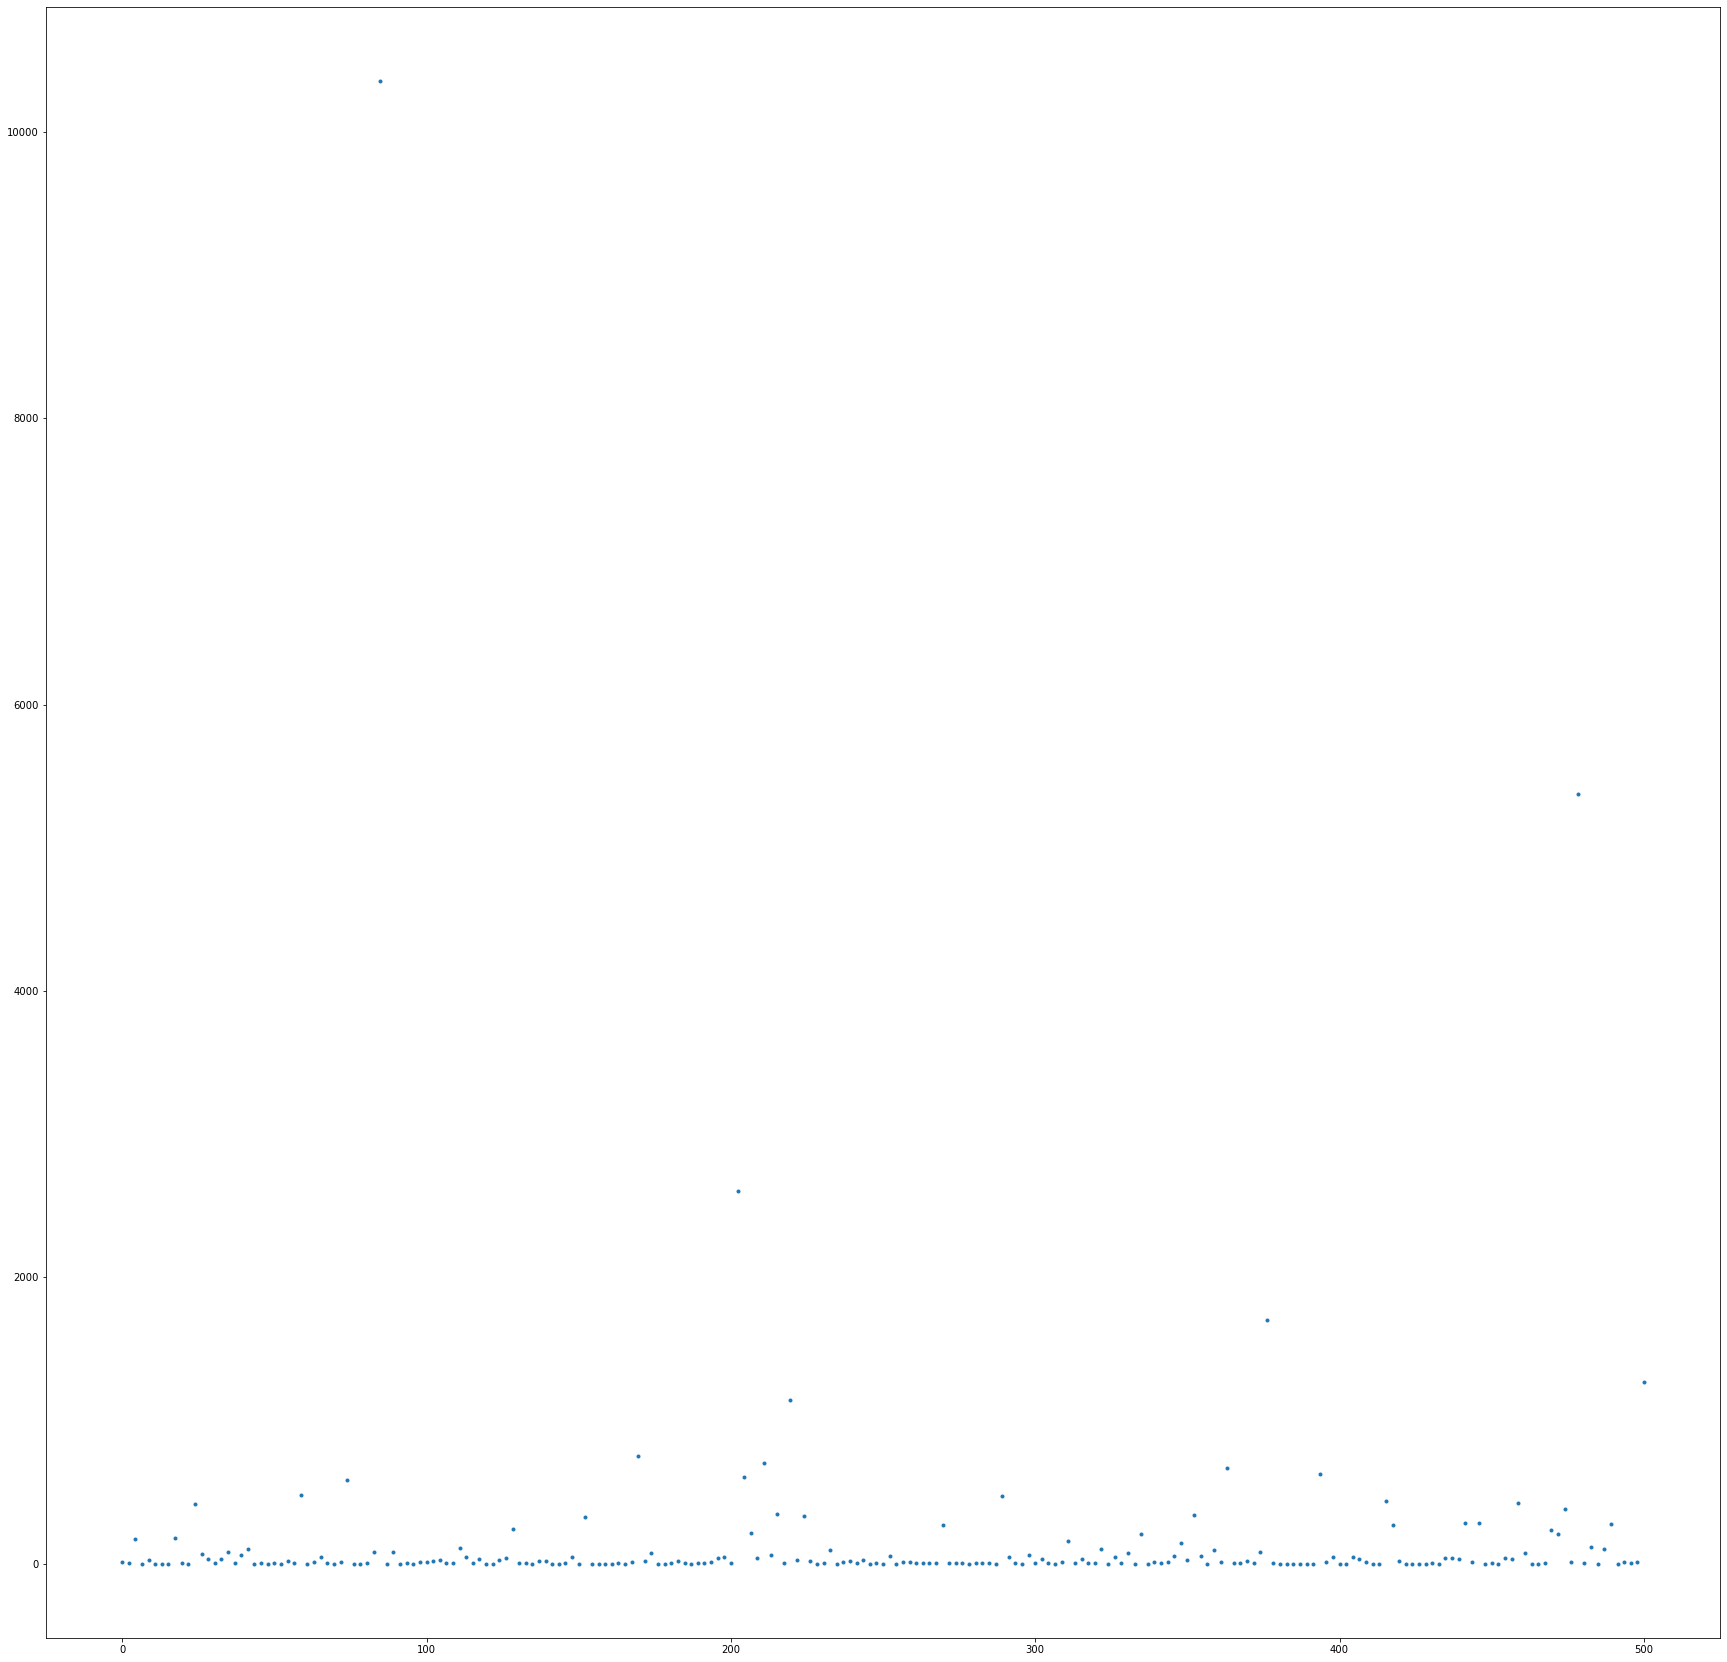

20


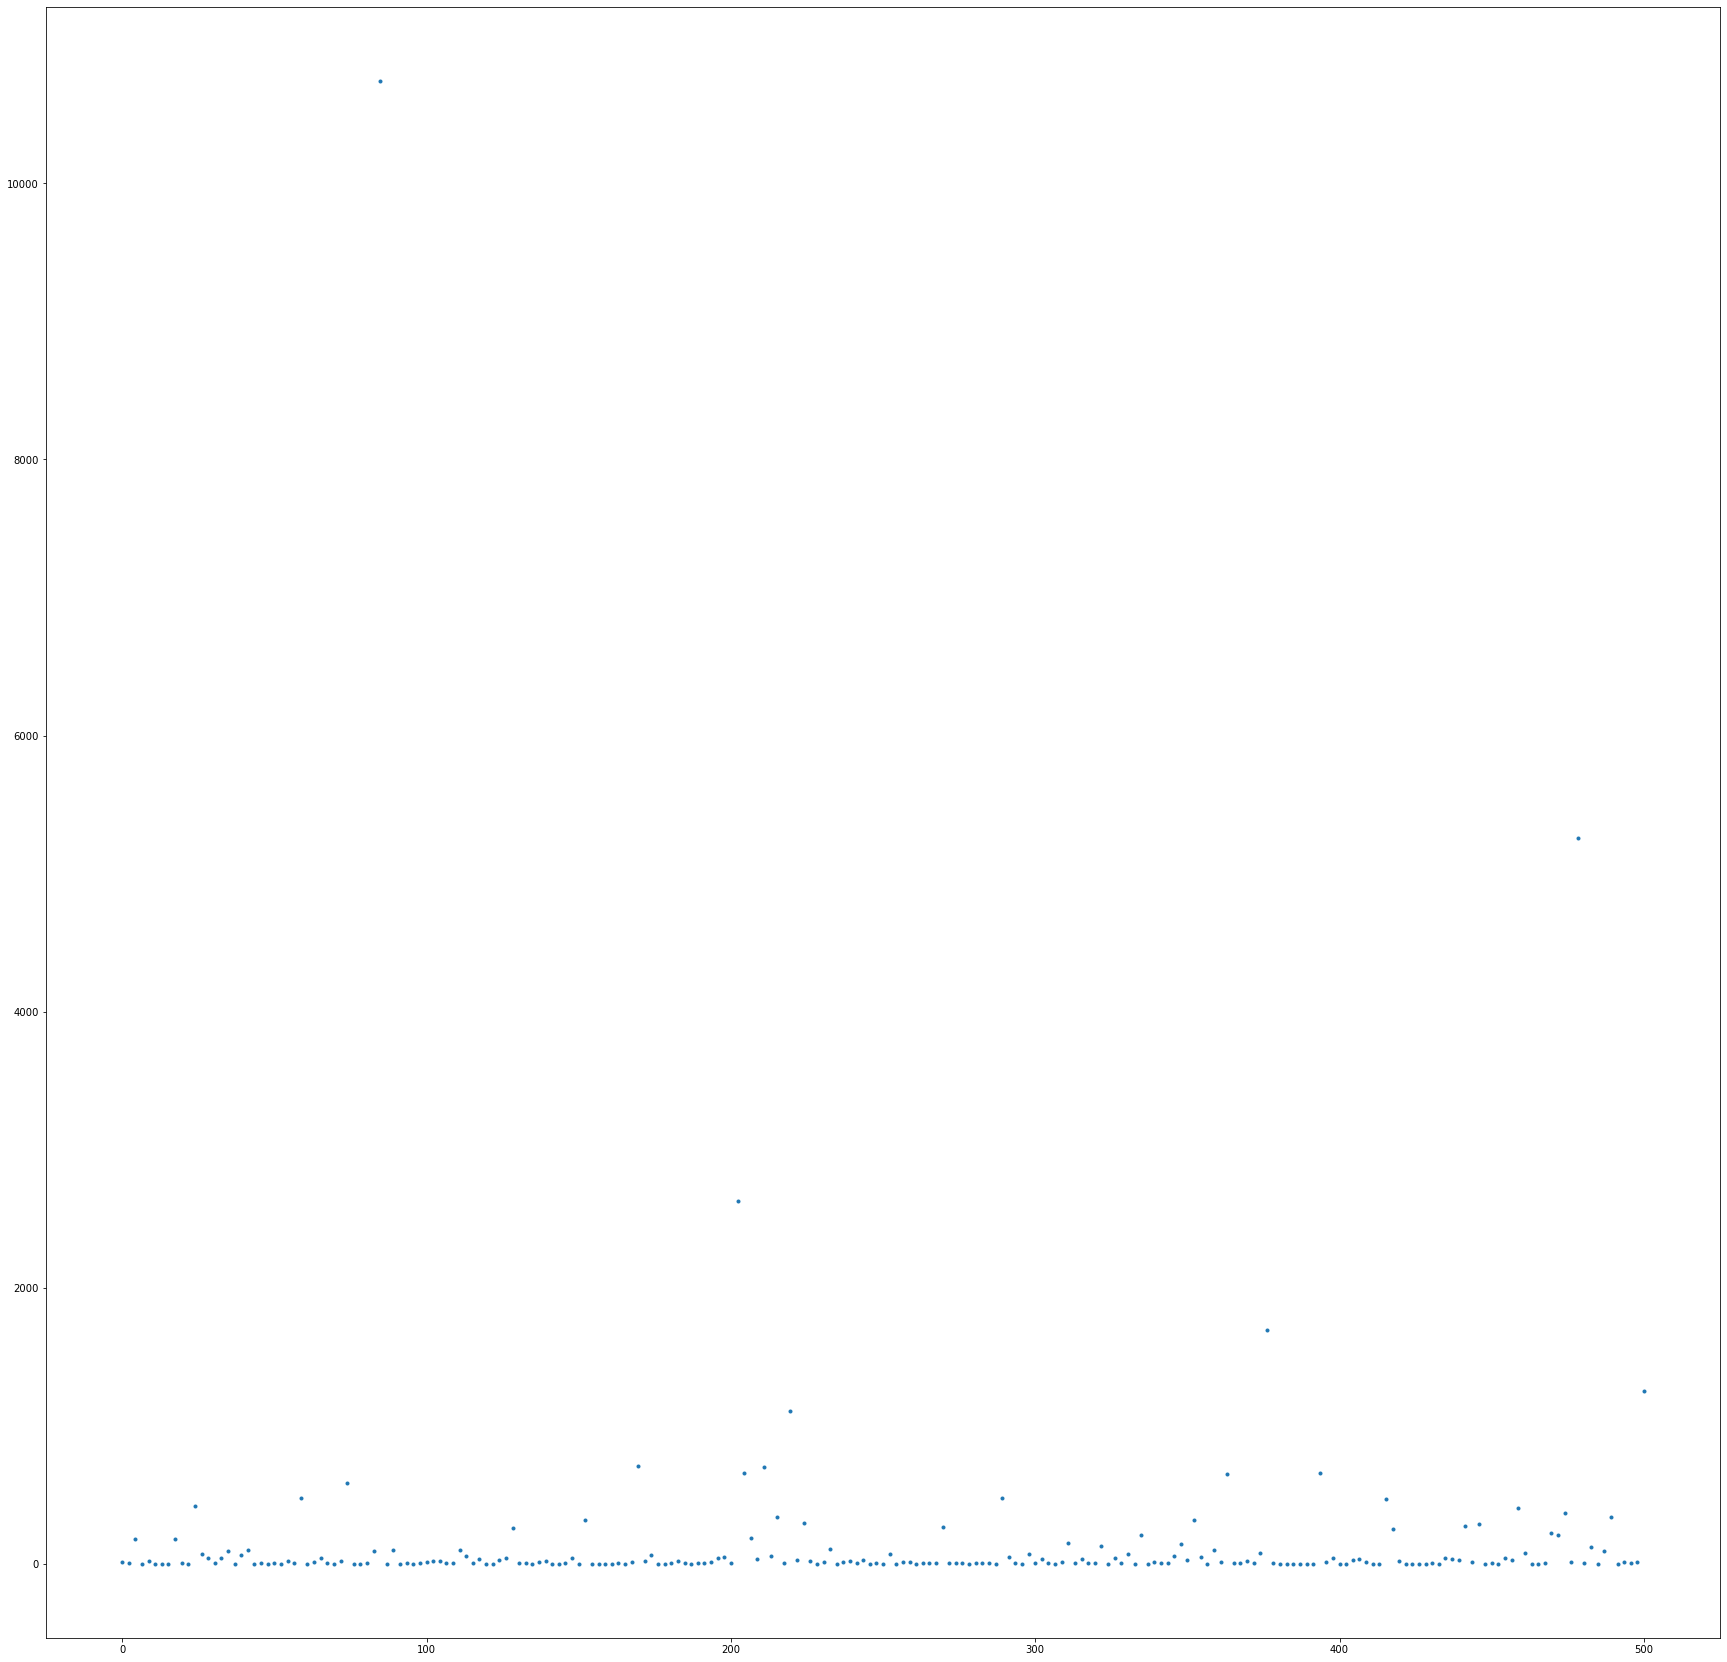

21


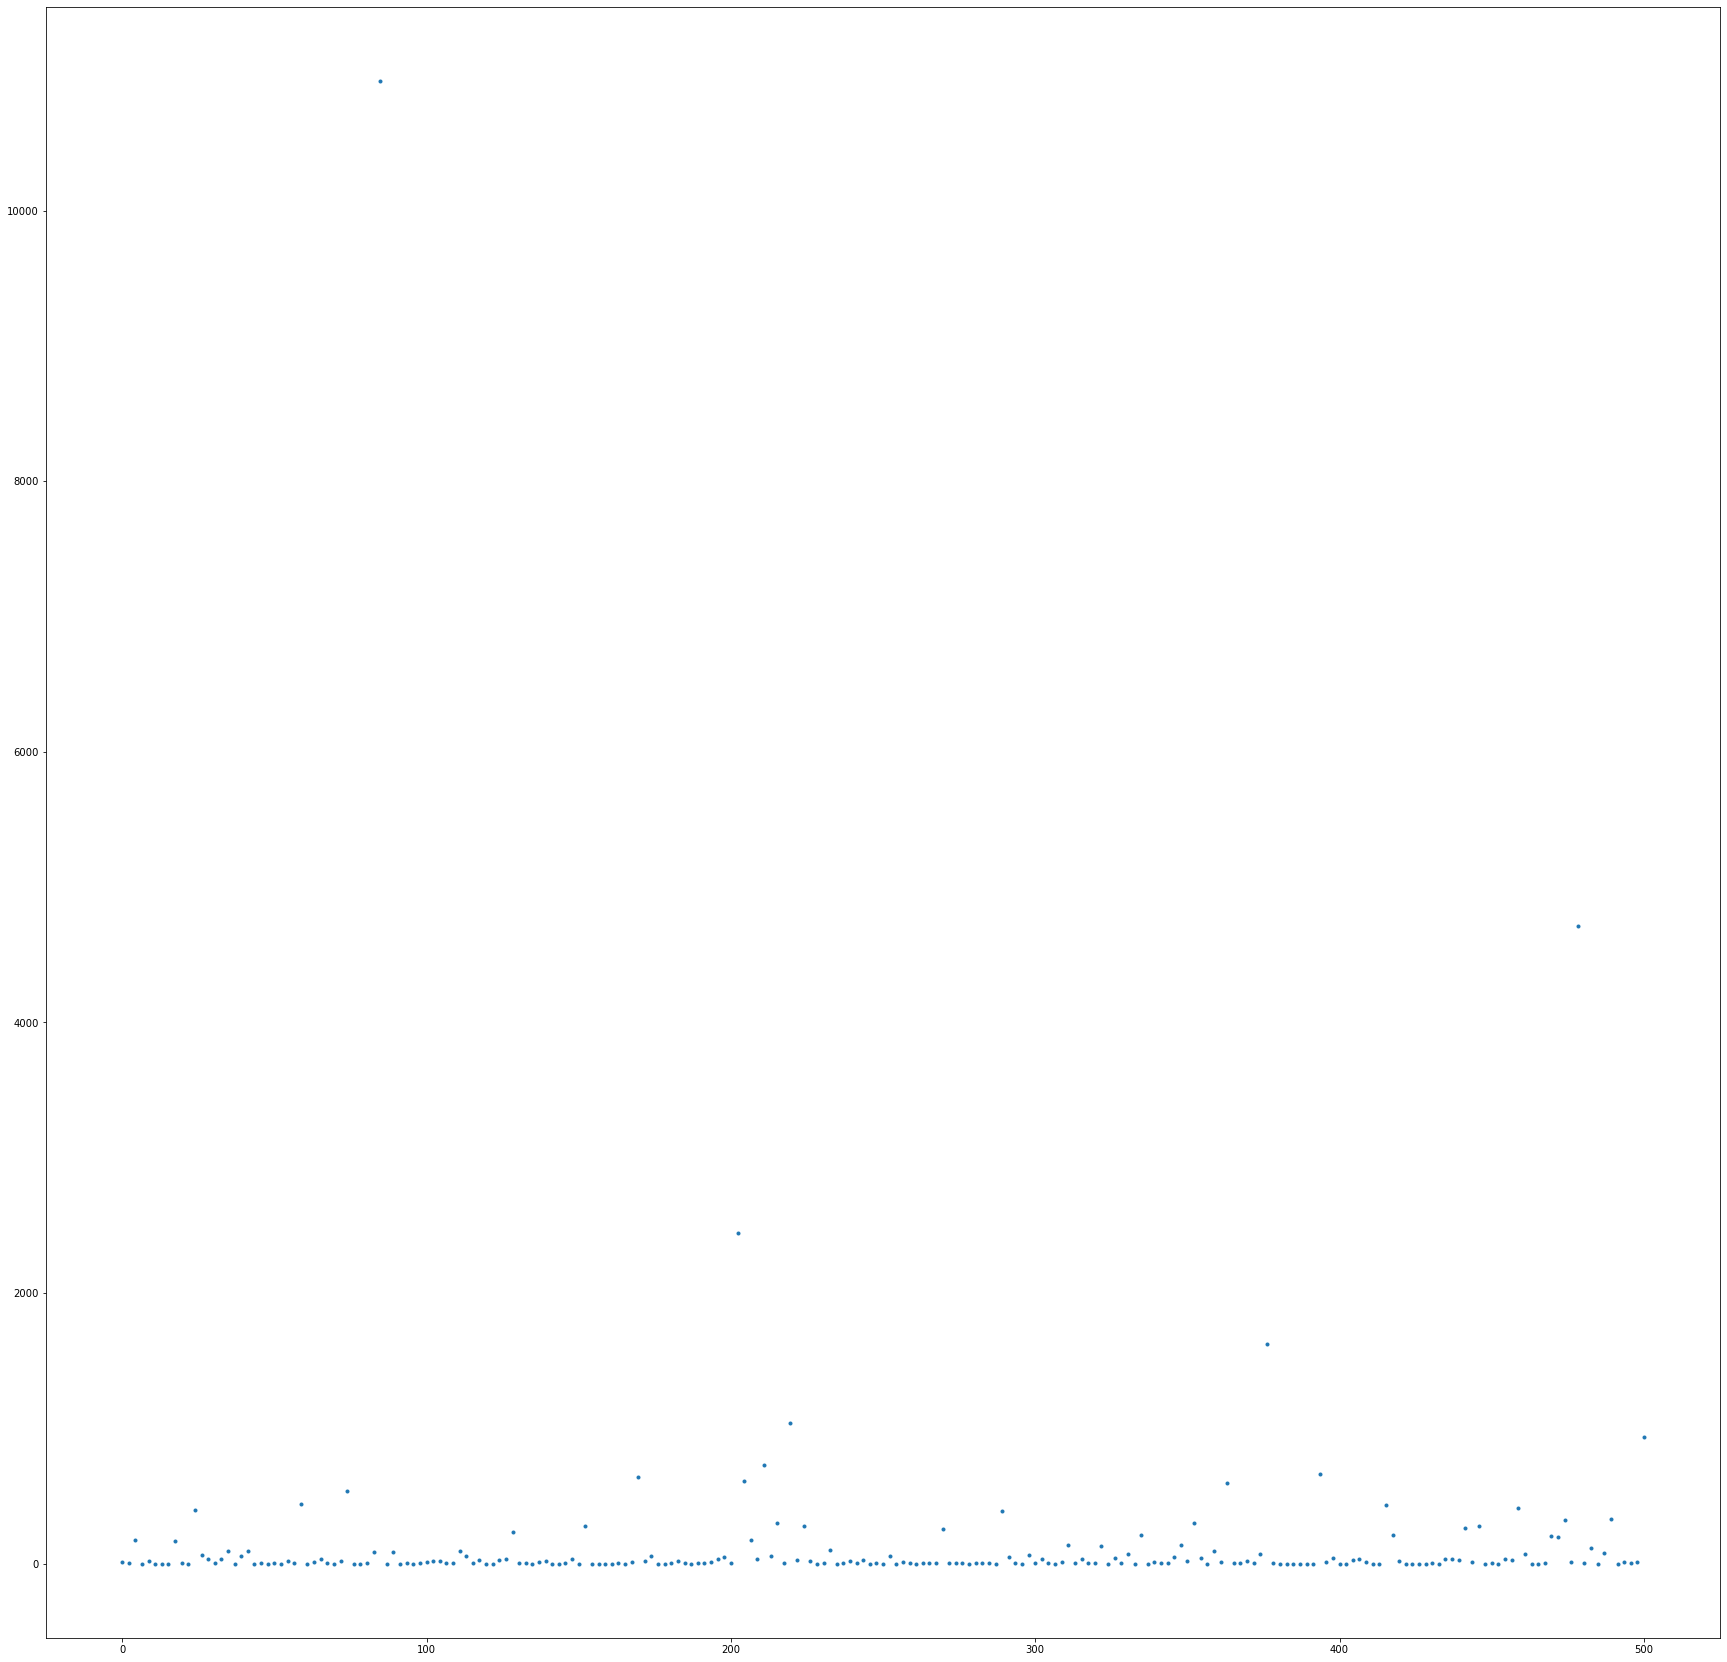

22


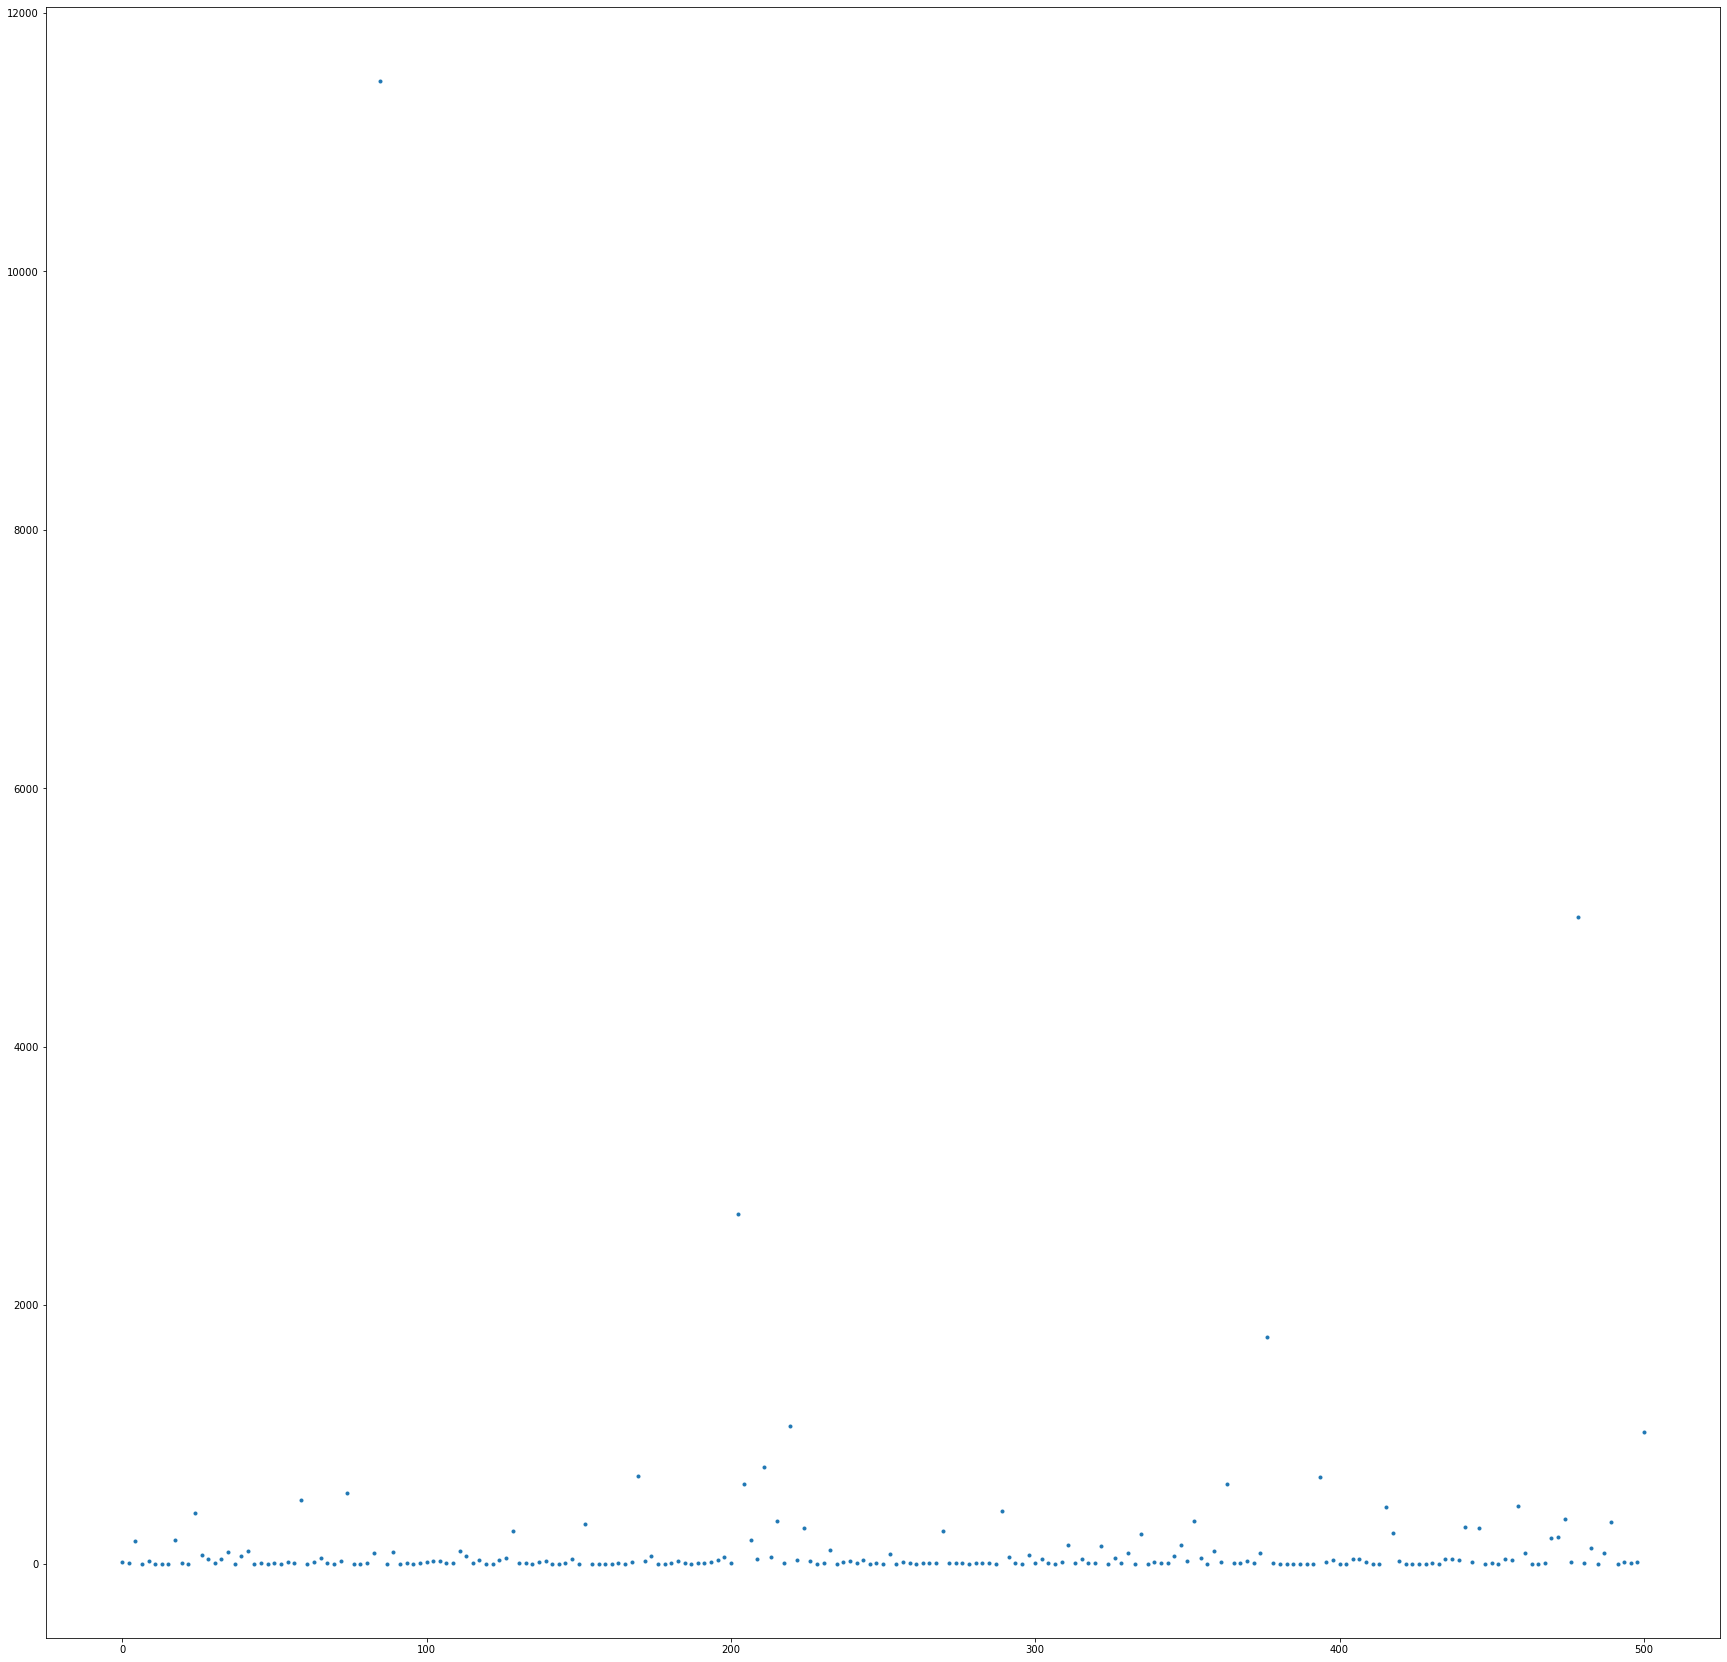

In [256]:
x = np.linspace(0, 500,231)
#print(x[0:5])
snapshots = dt[:-1].T
f=snapshots
c=0

for i in snapshots:
    c+=1
    print(c)
    plt.figure(figsize=(30,30))
    plt.plot(x, i, '.')
    plt.show()


In [257]:
dt1=dt.astype(float)

In [258]:
hodmd = DMD(svd_rank=0, exact=True, opt=True).fit(dt1)

In [259]:
hodmd.reconstructed_data.shape

(232, 22)

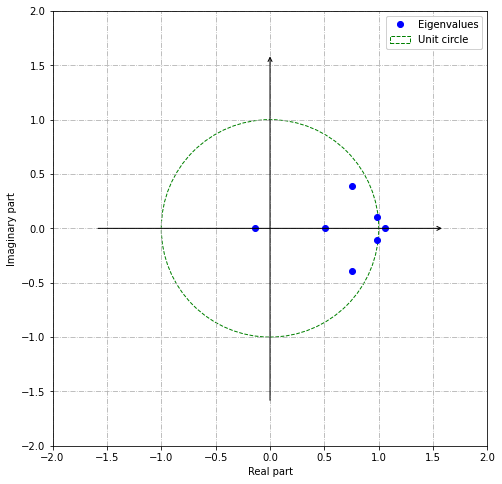

In [260]:
hodmd.plot_eigs()

In [261]:
t = np.linspace(0, 4*np.pi, 22)

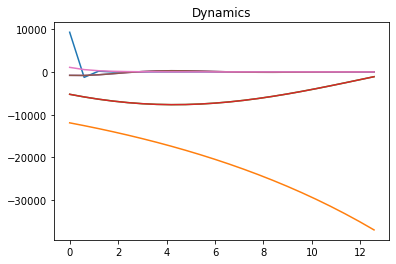

In [262]:
for dynamic in hodmd.dynamics:
    plt.plot(t, dynamic.real)
    plt.title('Dynamics')
plt.show()

In [263]:
print("Shape before manipulation: {}".format(hodmd.reconstructed_data.shape))
hodmd.dmd_time['dt'] *= .25
hodmd.dmd_time['tend'] *= 0.4
print("Shape after manipulation: {}".format(hodmd.reconstructed_data.shape))

Shape before manipulation: (232, 22)
Shape after manipulation: (232, 35)


In [264]:
fig = plt.figure()

dmd_states = [state for state in hodmd.reconstructed_data[:-2].T]

<Figure size 432x288 with 0 Axes>

In [272]:
dmd_states[10].shape

(230,)

D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
D:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return n

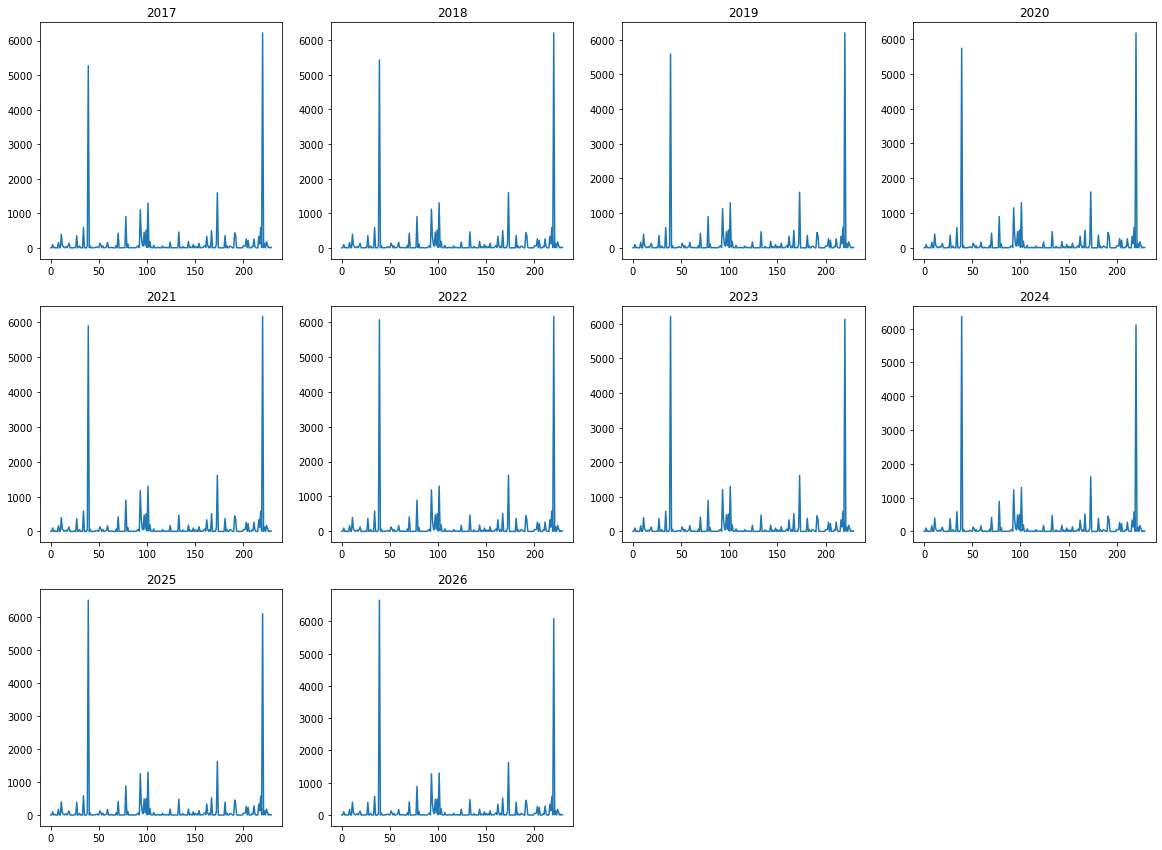

In [269]:
fig = plt.figure(figsize=(20,20))
b=17
for id_subplot, snapshot in enumerate(dmd_states[17:27], start=1):
    plt.subplot(4, 4, id_subplot)
    plt.plot(snapshot)
    plt.title(2000+b)
    b+=1
    

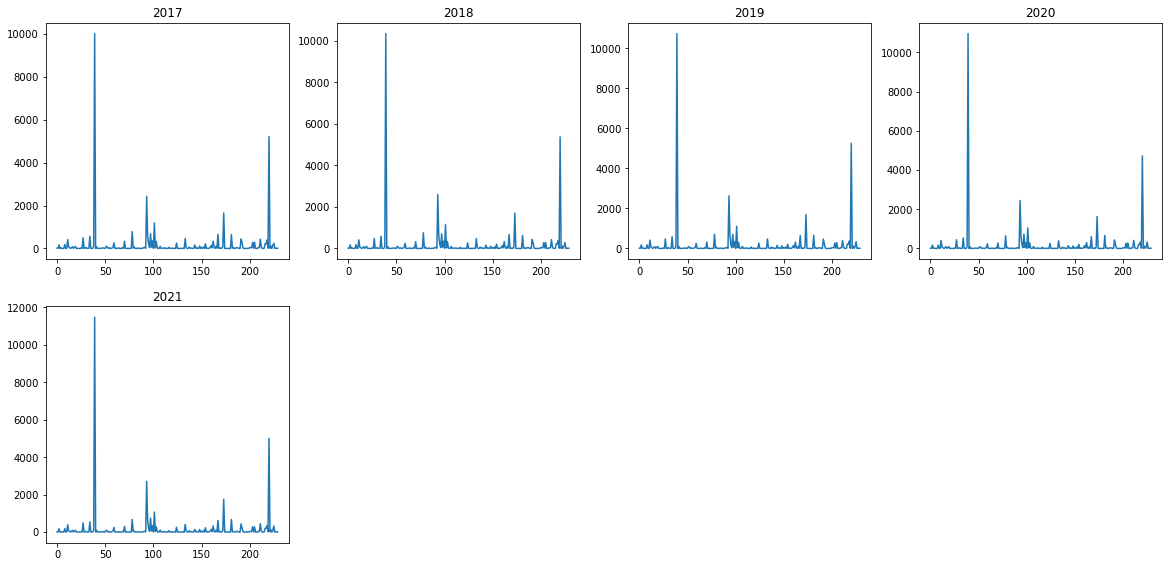

In [270]:
dt2=dt[:-2].T
fig = plt.figure(figsize=(20,20))
b=17
for id_subplot, snapshot in enumerate(dt2[17:], start=1):
    plt.subplot(4, 4, id_subplot)
    plt.plot(snapshot)
    plt.title(2000+b)
    b+=1
    

In [271]:
dt2[0].shape

(230,)

In [227]:
dt.shape

(232, 22)

In [228]:
x0=dt1[:,:21]
x1=dt1[:,1:22]
x0.shape

(232, 21)

In [229]:
U, s, V = np.linalg.svd(x0,full_matrices=False)

In [230]:
s.shape
s1=np.diag(s)
s1.shape
s2=np.linalg.inv(s1)

In [231]:
s2.shape

(21, 21)

In [232]:
Atil=U.T @ x1 @ V.T @ s2

In [233]:
Atil.shape

(21, 21)

In [234]:
w,v=np.linalg.eig(Atil)

In [235]:
evec=x1 @ V.T @ np.linalg.inv(s1) @ w

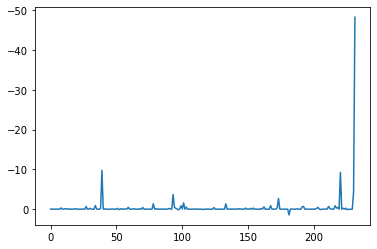

In [236]:
plt.plot(evec.real)
plt.gca().invert_yaxis()

In [237]:
evec.shape

(232,)

In [238]:
c1=dt1[:,1]

In [239]:
b=evec/c1

C:\Users\Sahil\AppData\Local\Temp\ipykernel_2580\2883851432.py:1: RuntimeWarning: divide by zero encountered in true_divide
  b=evec/c1
C:\Users\Sahil\AppData\Local\Temp\ipykernel_2580\2883851432.py:1: RuntimeWarning: invalid value encountered in true_divide
  b=evec/c1


In [240]:
m1=np.linalg.matrix_power(v,23)
evec.T.shape

(232,)

In [241]:
newx=evec*m1*b

ValueError: operands could not be broadcast together with shapes (232,) (21,21) 